In [1]:
from pathlib import Path
import sys
import json
import datetime

PROJ_DIR = Path.cwd().parent.parent
sys.path.append(str(PROJ_DIR))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import animation
import matplotlib.font_manager as fm
from IPython.display import HTML
fm.fontManager.addfont('../resources/arial.ttf')

import numpy as np
import pandas as pd

from src.defaults import ROOT_DIR
from src.checkpoint import CheckpointableData, Checkpointer
from src.config import BaseConfig, Require
from src.shared import get_env
from src.smbpo import SMBPO
from src.tester import Tester
from src.viz_tracking.opt_controller import OptController

ROOT_DIR = Path(ROOT_DIR)
assert ROOT_DIR.is_dir(), ROOT_DIR
LOGS_DIR = ROOT_DIR / 'logs' / 'tracking'

params = {
    'font.family': 'Arial',
    'font.serif': 'Arial',
    # 'font.style': 'italic',
    # 'font.weight': 'normal', #or 'blod'
    'font.size': 15,  # or large,small
    'animation.ffmpeg_path': r'/usr/bin/ffmpeg'
}
rcParams.update(params)

class Config(BaseConfig):
    env_name = "tracking"
    env_cfg = {
        "pre_horizon" : 10,
        "surr_veh_num" : 1,
    }
    seed = 1
    epochs = 600
    alg_cfg = SMBPO.Config()
    alg = 'DRPO'
    opt_args = {
        "num_pred_step": 40,
        "gamma": 0.99,
        "mode": "shooting",
        "minimize_options": {
            "max_iter": 200,
            "tol": 1e-3,
            "acceptable_tol": 1e-2,
            "acceptable_iter": 50,
            # "print_level": 5,
        },
        "use_terminal_cost": False,
        "verbose": 1,
    }

/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/yudongjie/safe_proj/safe-control-gym/safe_control_gym/utils/configuration.py:72: UserWarning: No agent/task config given.
  warnings.warn("No agent/task config given.")
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Test log directory: /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-25-23_13.47.32_DRPO_22/MPC
env <SimuVeh3dofcontiSurrCstr2 instance>
surr 0: d_lon: 8, d_lat: 3.5, u: 4.5

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 28
* Cost function calls: 38
* Constraint calls: 70
* System simulations: 108
* Final cost: 1.3198444843292236 



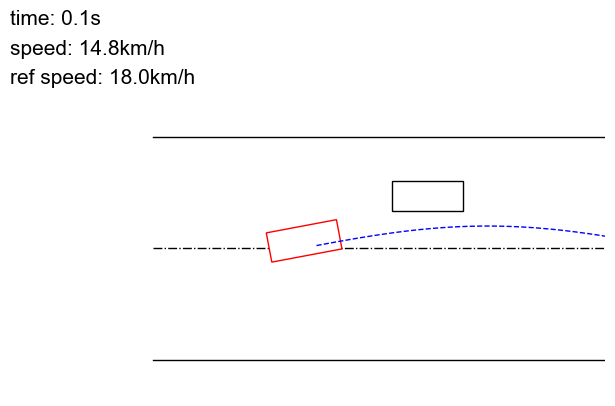

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 12
* Constraint calls: 21
* System simulations: 33
* Final cost: 1.1873351335525513 



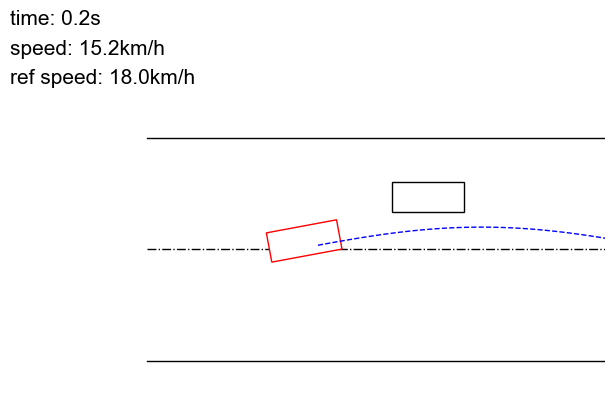

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 11
* Constraint calls: 20
* System simulations: 31
* Final cost: 1.0722148418426514 



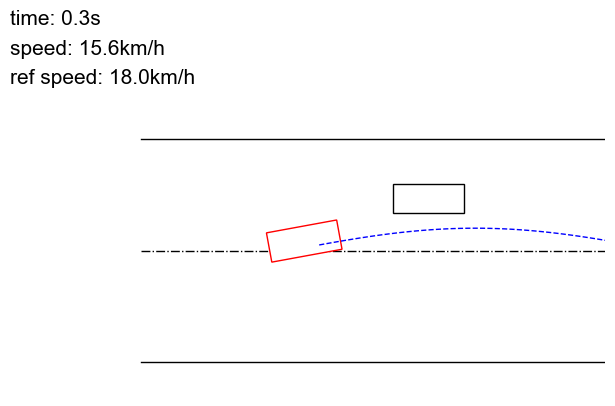

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 14
* Cost function calls: 22
* Constraint calls: 40
* System simulations: 62
* Final cost: 0.9719967842102051 



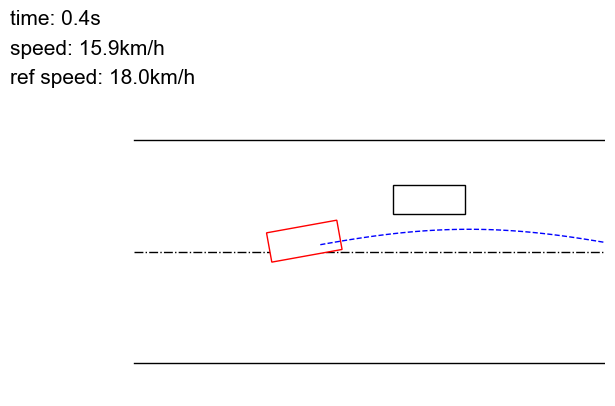

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 11
* Constraint calls: 20
* System simulations: 31
* Final cost: 0.8845734000205994 



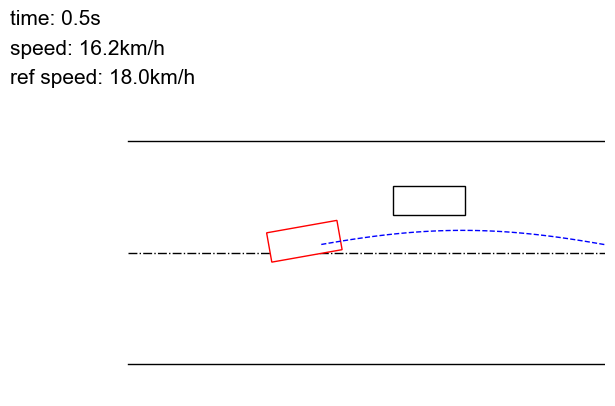

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.8080136775970459 



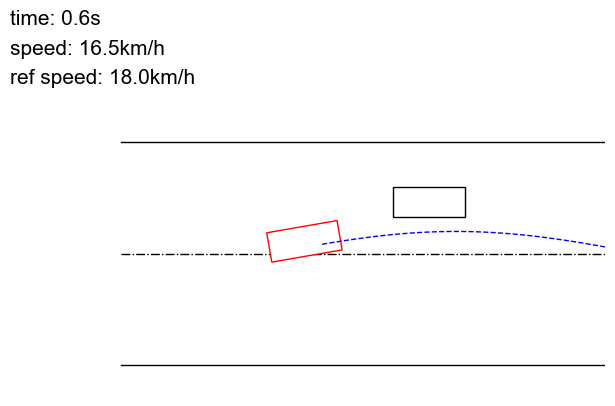

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 12
* Constraint calls: 25
* System simulations: 37
* Final cost: 0.7406385540962219 



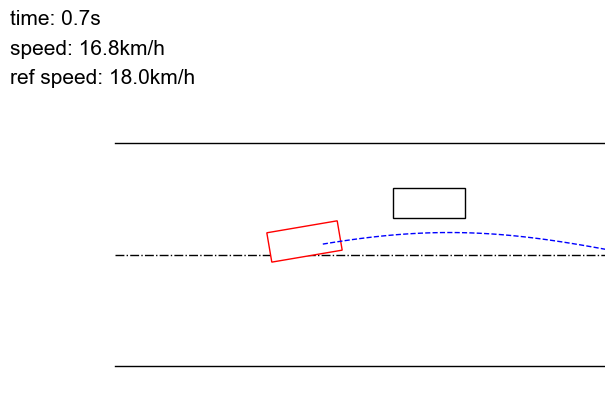

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.6808364987373352 



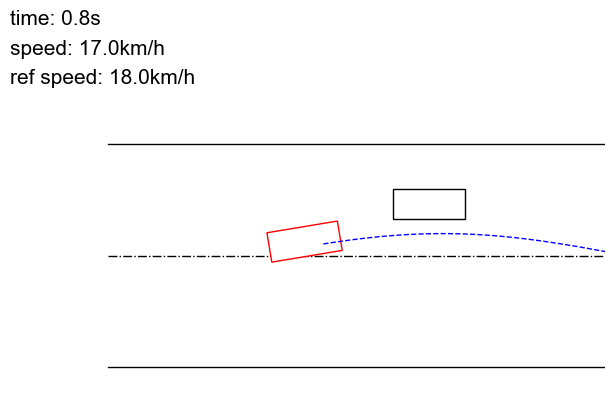

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 8
* Constraint calls: 17
* System simulations: 25
* Final cost: 0.6276832818984985 



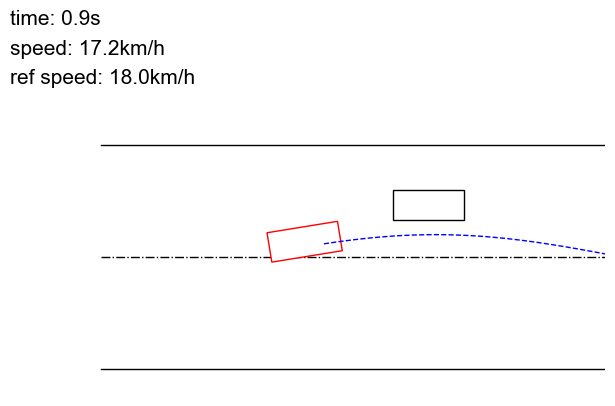

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 13
* Constraint calls: 26
* System simulations: 39
* Final cost: 0.5800573229789734 



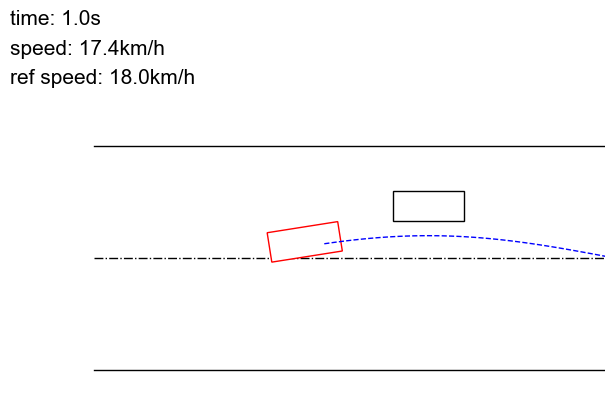

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 8
* Constraint calls: 17
* System simulations: 25
* Final cost: 0.5369194746017456 



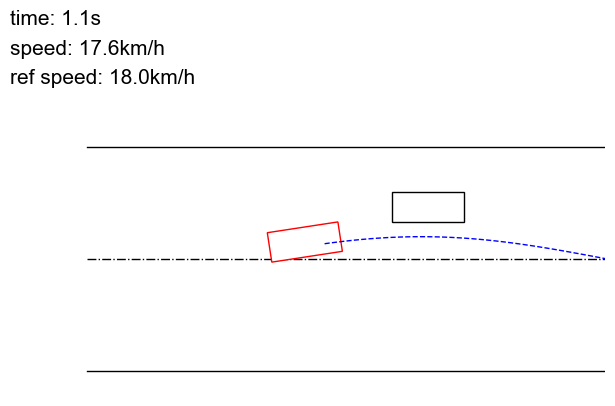

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 10
* Constraint calls: 20
* System simulations: 30
* Final cost: 0.4978092312812805 



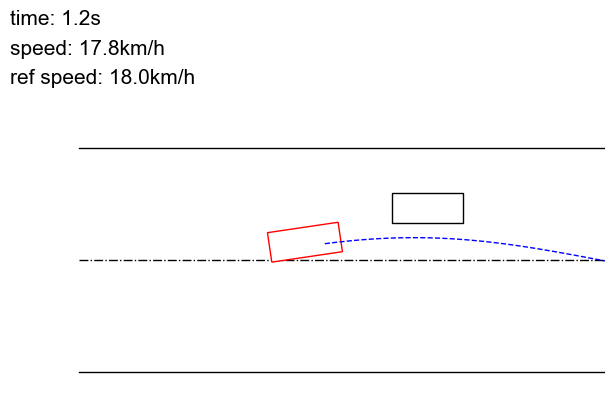

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 12
* Cost function calls: 27
* Constraint calls: 43
* System simulations: 70
* Final cost: 0.46202656626701355 



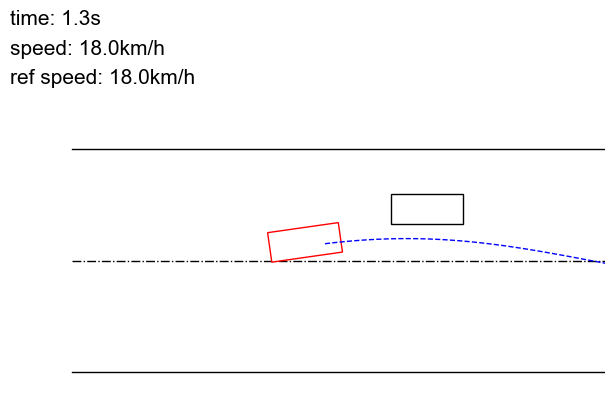

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 8
* Constraint calls: 17
* System simulations: 25
* Final cost: 0.4289962649345398 



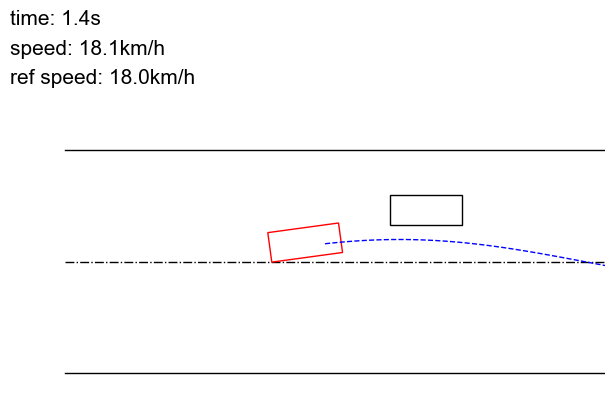

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 10
* Constraint calls: 20
* System simulations: 30
* Final cost: 0.3984638750553131 



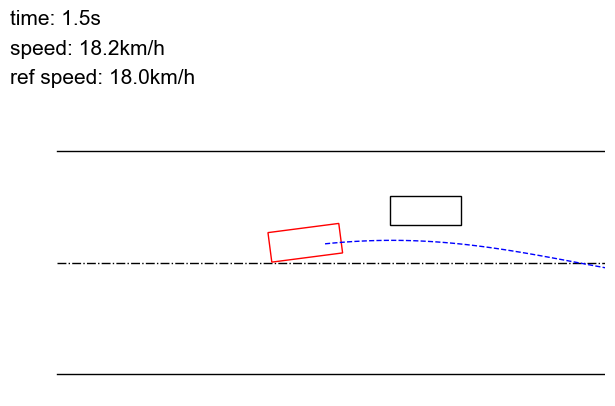

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 20
* Constraint calls: 30
* System simulations: 50
* Final cost: 0.3700157701969147 



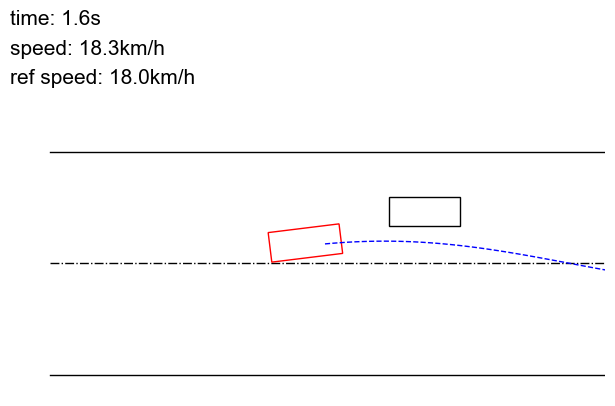

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.3434036374092102 



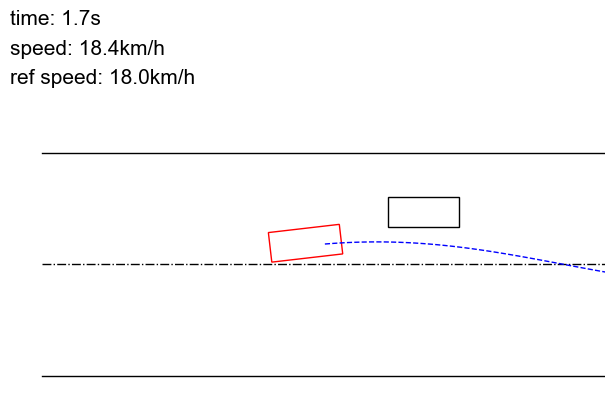

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 10
* Constraint calls: 19
* System simulations: 29
* Final cost: 0.31848666071891785 



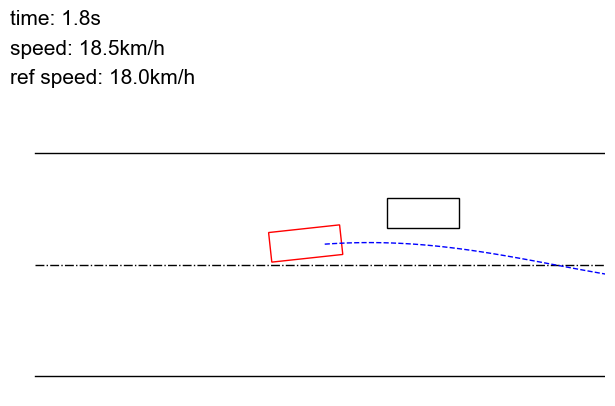

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 8
* Constraint calls: 17
* System simulations: 25
* Final cost: 0.2950148582458496 



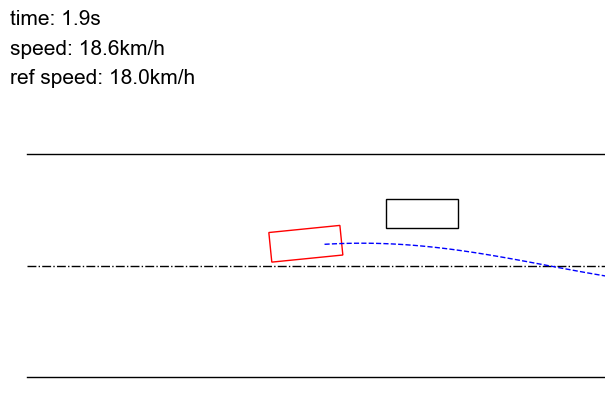

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 12
* Constraint calls: 21
* System simulations: 33
* Final cost: 0.27294716238975525 



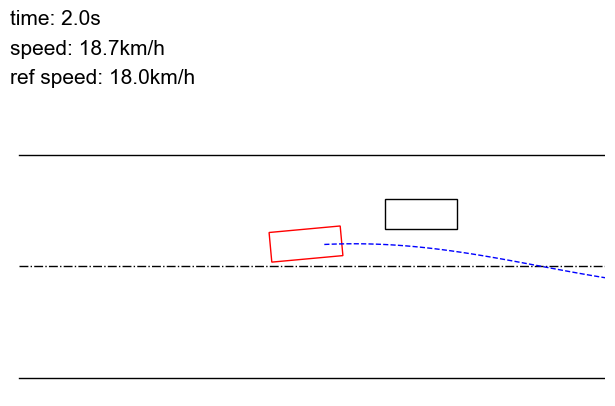

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 9
* Constraint calls: 16
* System simulations: 25
* Final cost: 0.2521364092826843 



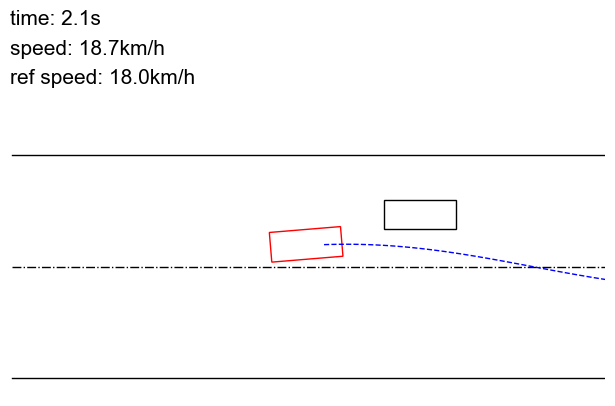

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.23257485032081604 



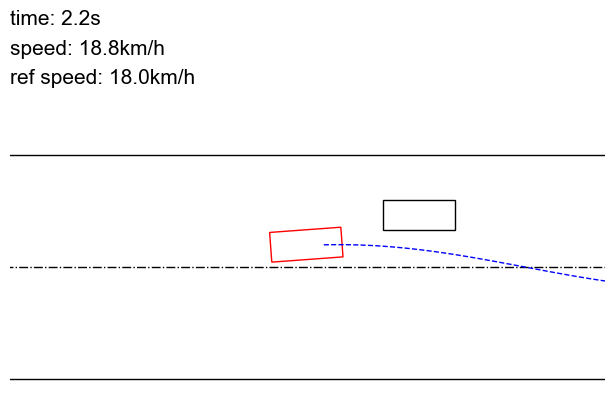

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 15
* Cost function calls: 28
* Constraint calls: 47
* System simulations: 75
* Final cost: 0.21413569152355194 



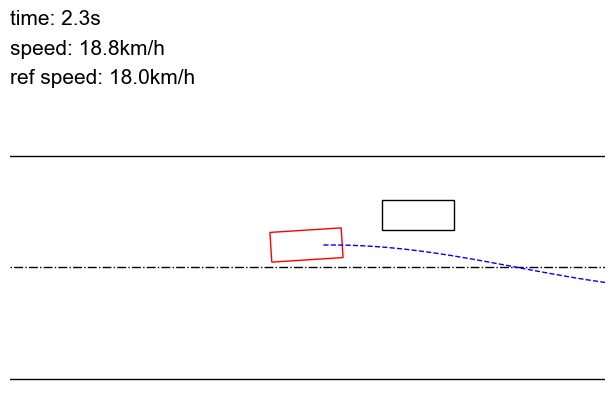

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.19685688614845276 



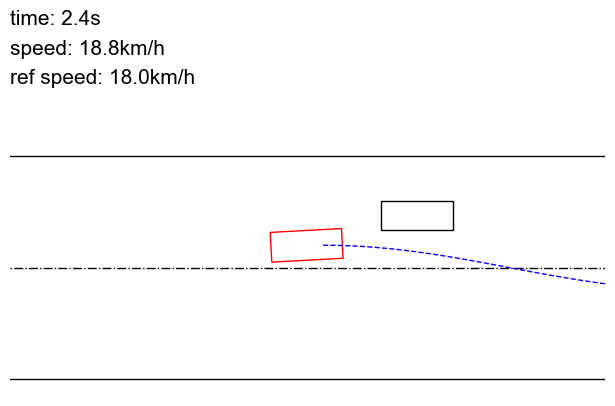

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 14
* Constraint calls: 27
* System simulations: 41
* Final cost: 0.18066191673278809 



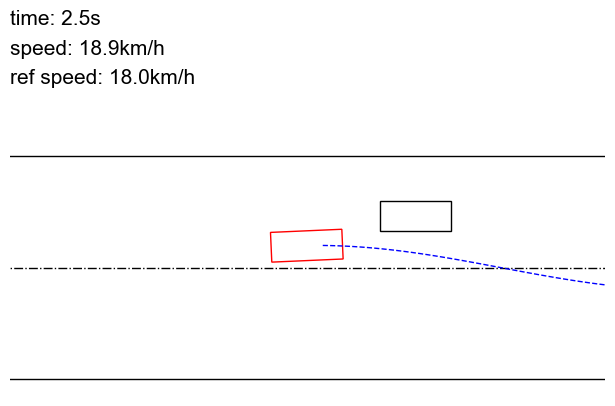

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 11
* Constraint calls: 22
* System simulations: 33
* Final cost: 0.16553044319152832 



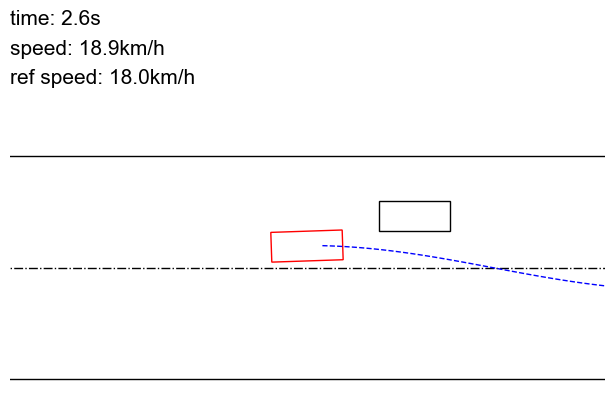

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 11
* Constraint calls: 21
* System simulations: 32
* Final cost: 0.15143552422523499 



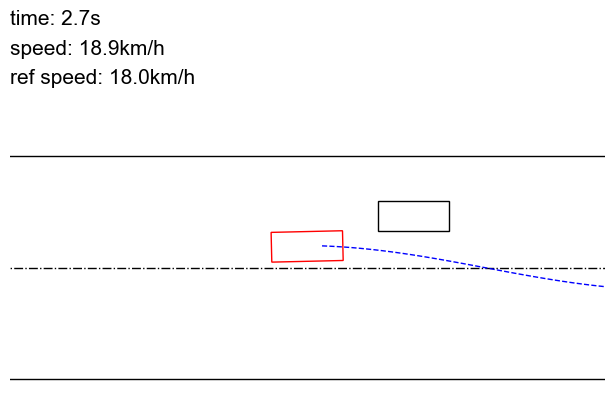

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 11
* Constraint calls: 22
* System simulations: 33
* Final cost: 0.13836096227169037 



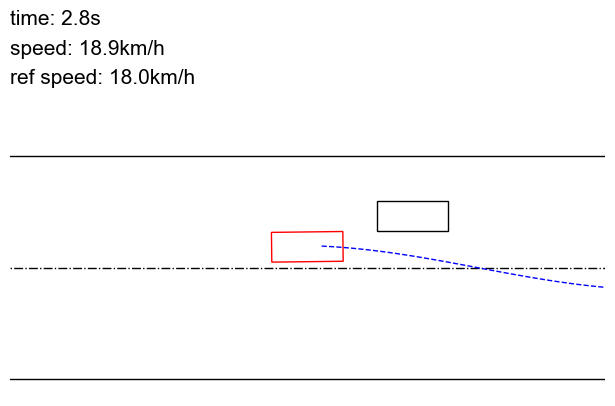

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.12627609074115753 



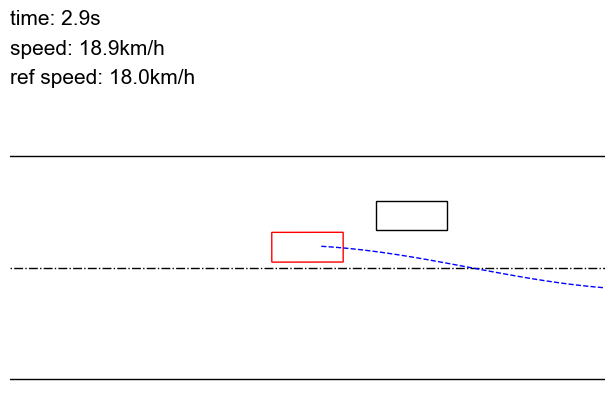

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 13
* Constraint calls: 22
* System simulations: 35
* Final cost: 0.11520964652299881 



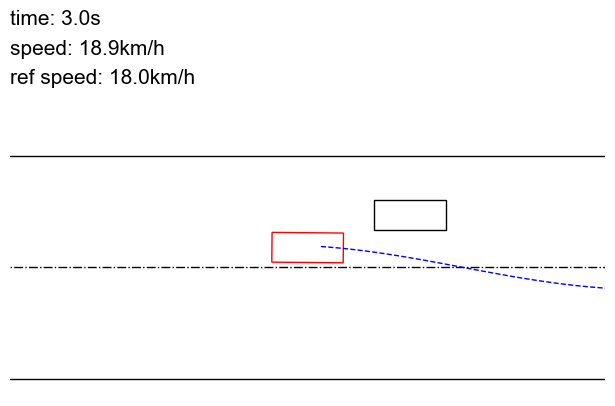

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.10510463267564774 



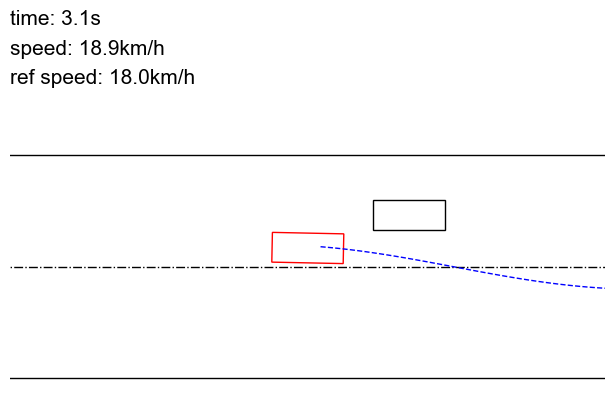

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.09593095630407333 



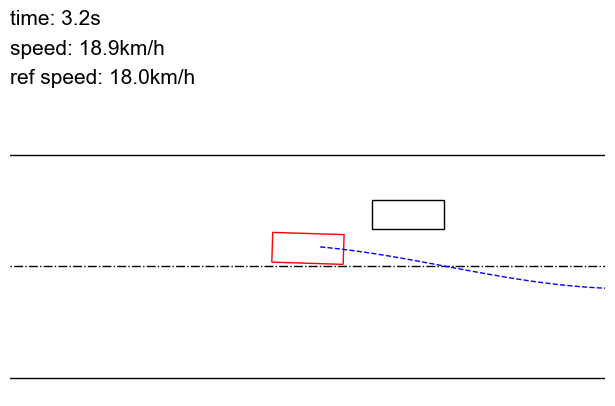

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.08768078684806824 



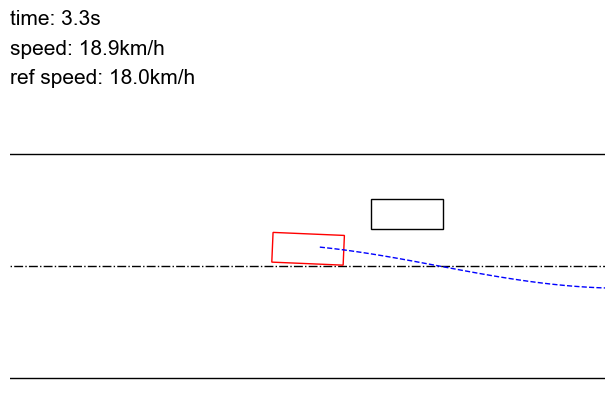

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.08033468574285507 



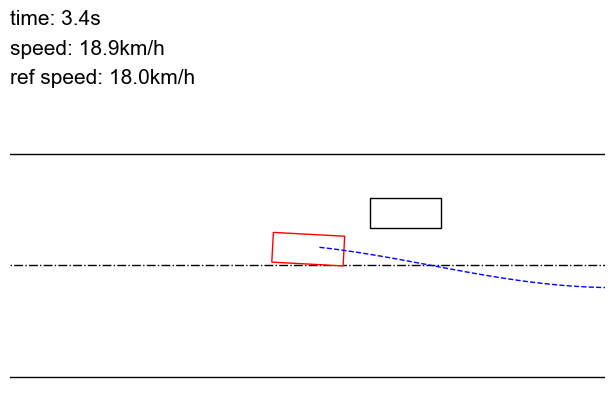

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.07386647164821625 



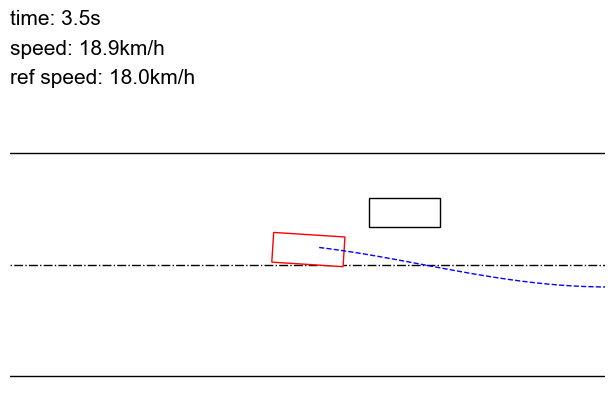

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.06824982911348343 



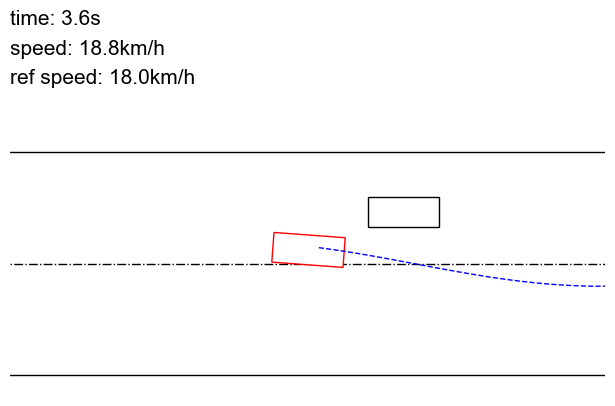

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.06345129758119583 



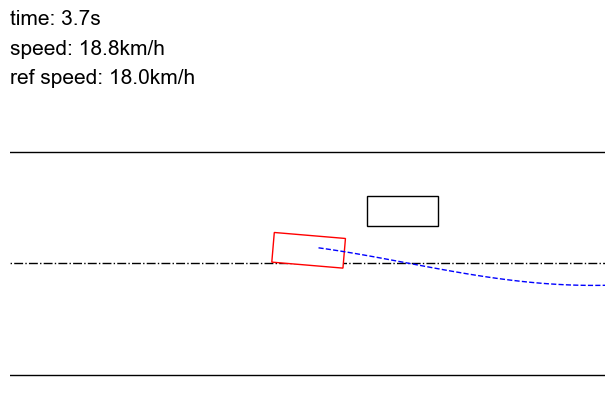

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.05943605676293373 



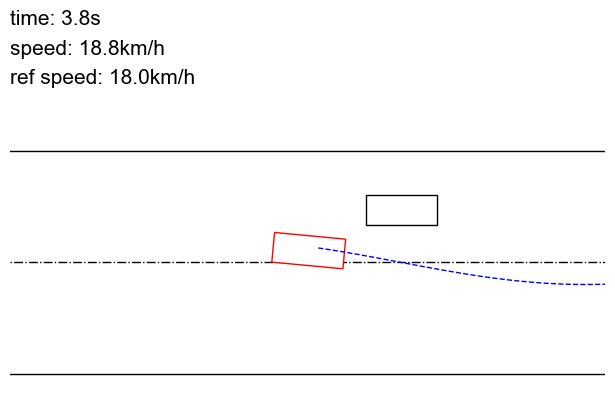

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.05616682022809982 



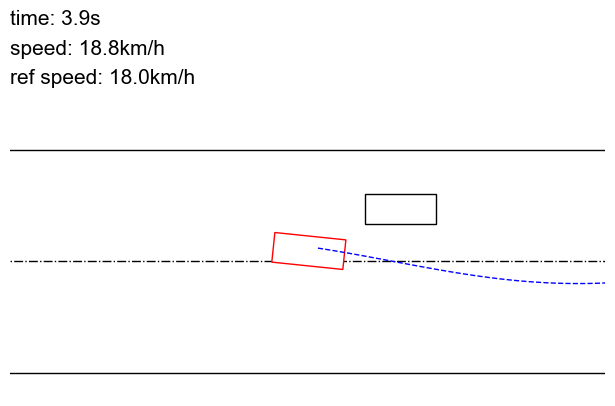

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.05360465496778488 



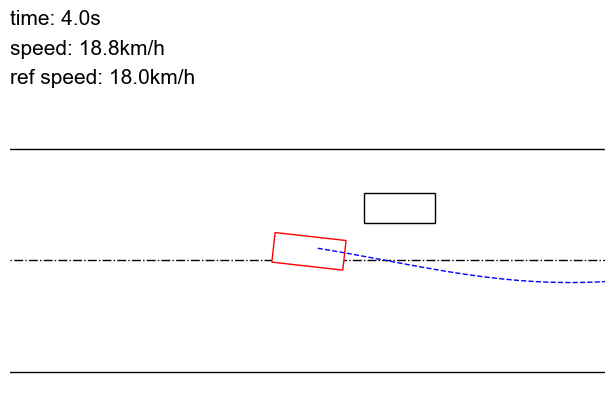

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.05170857161283493 



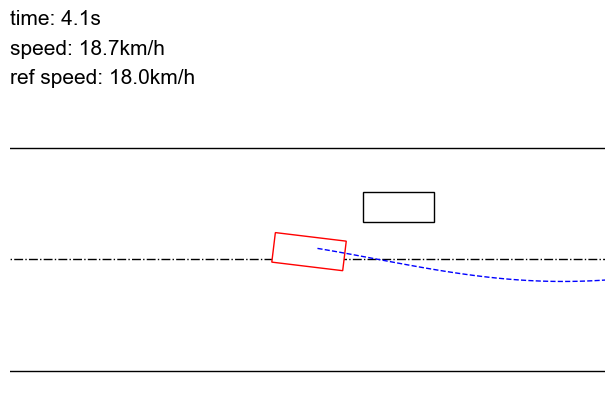

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.05043346434831619 



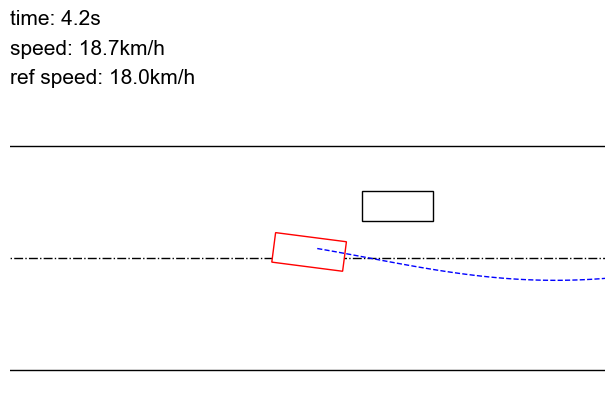

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.049732506275177 



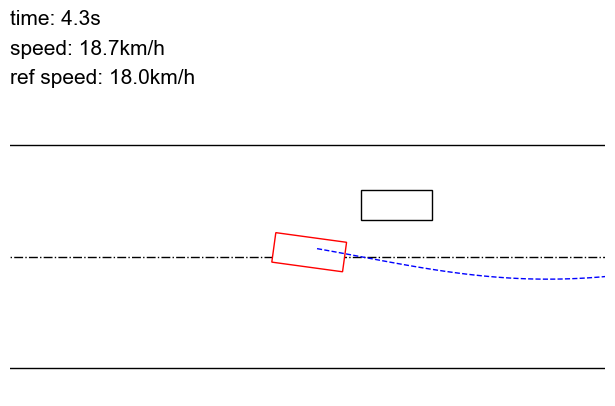

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.04955603554844856 



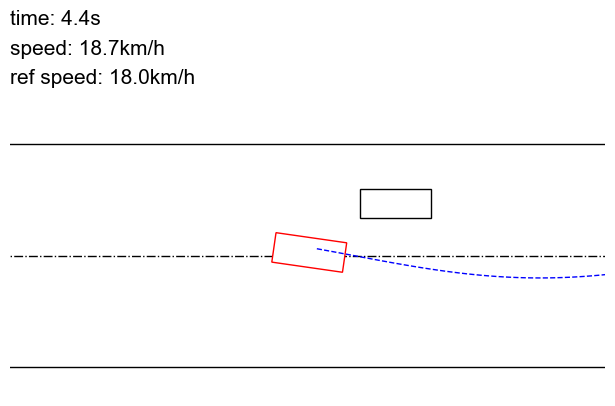

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.04985261335968971 



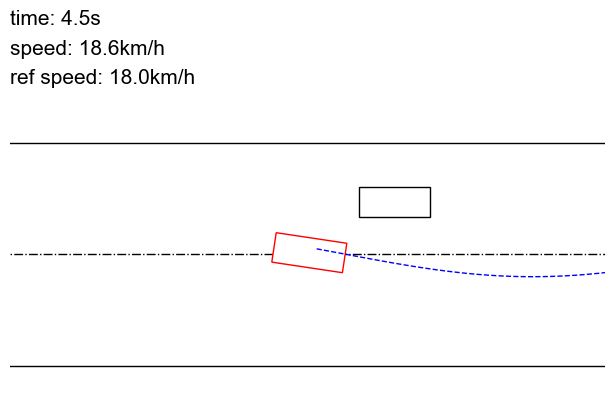

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.050568729639053345 



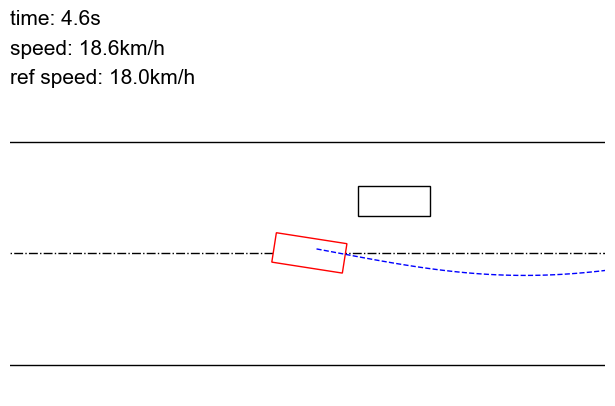

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.05164744332432747 



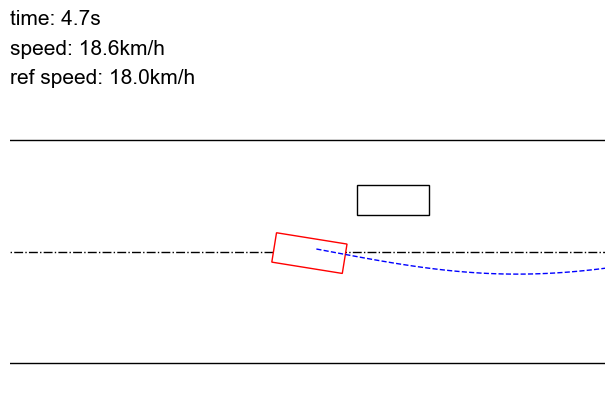

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.05303512141108513 



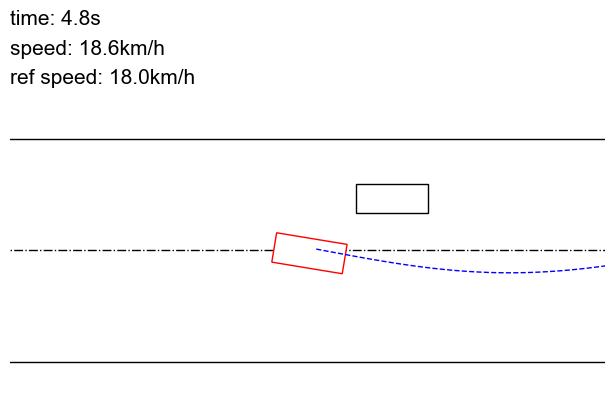

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 10
* Constraint calls: 21
* System simulations: 31
* Final cost: 0.05466824769973755 



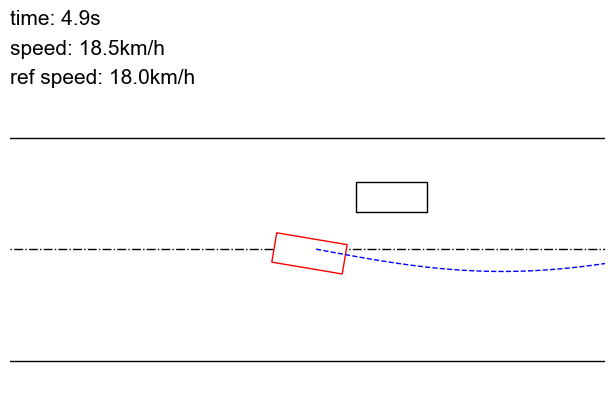

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.05649391934275627 



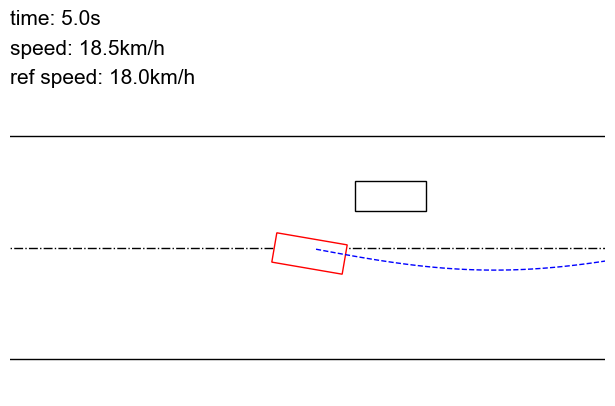

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 10
* Constraint calls: 21
* System simulations: 31
* Final cost: 0.05845832824707031 



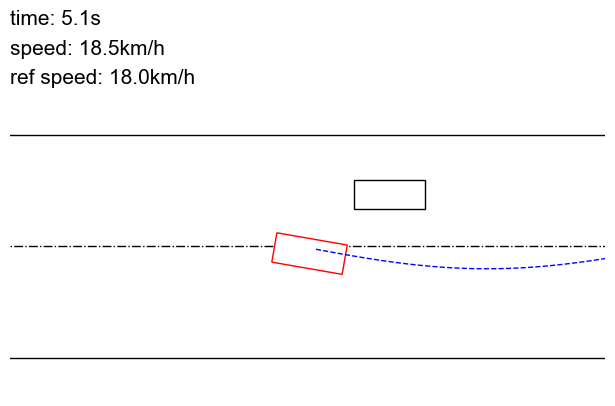

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 10
* Constraint calls: 21
* System simulations: 31
* Final cost: 0.06050517410039902 



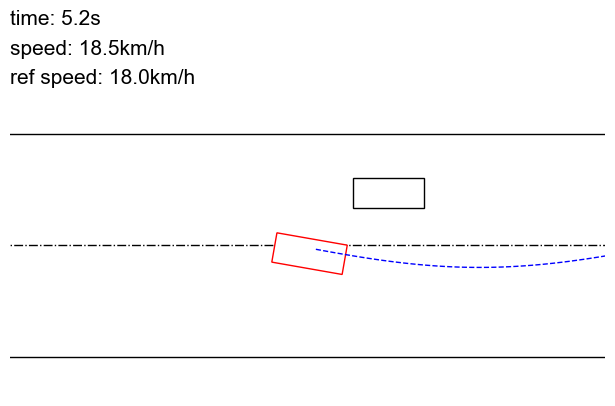

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 10
* Constraint calls: 21
* System simulations: 31
* Final cost: 0.0625828355550766 



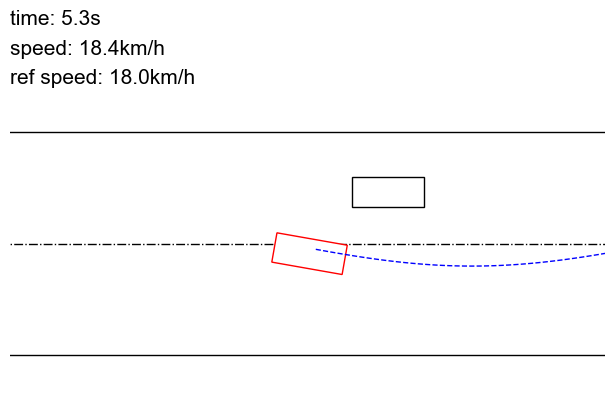

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 12
* Constraint calls: 23
* System simulations: 35
* Final cost: 0.06463921070098877 



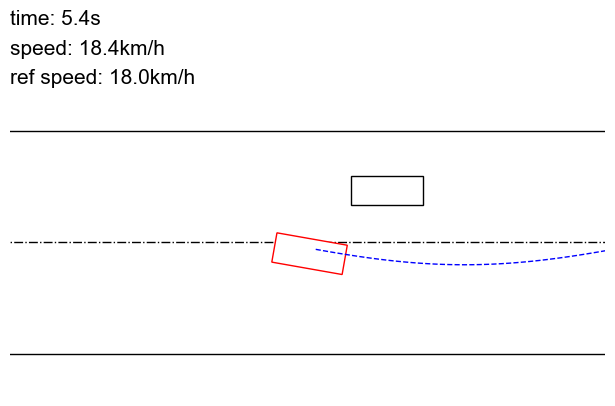

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.06662481278181076 



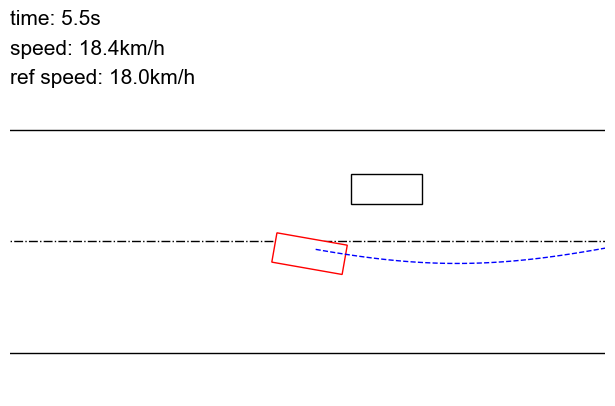

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.0684952661395073 



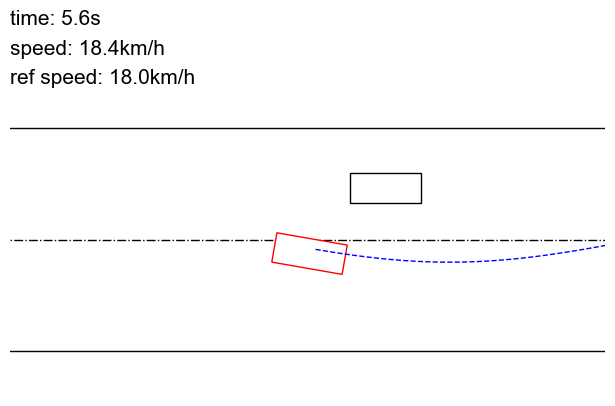

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 12
* Constraint calls: 23
* System simulations: 35
* Final cost: 0.07020798325538635 



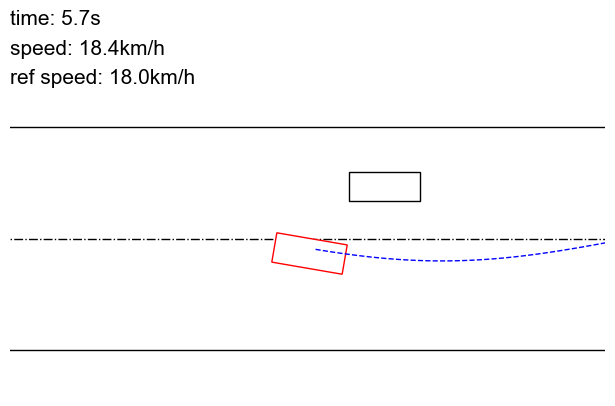

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.071725994348526 



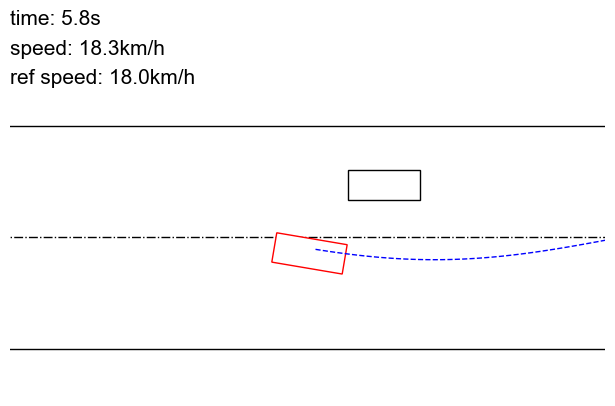

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 11
* Constraint calls: 22
* System simulations: 33
* Final cost: 0.0730072408914566 



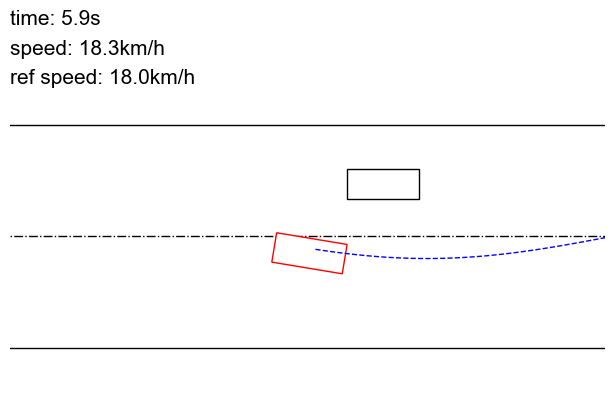

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 10
* Constraint calls: 21
* System simulations: 31
* Final cost: 0.07403471320867538 



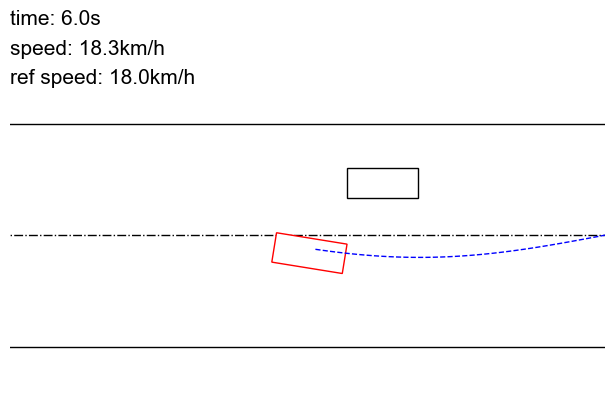

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.07477735728025436 



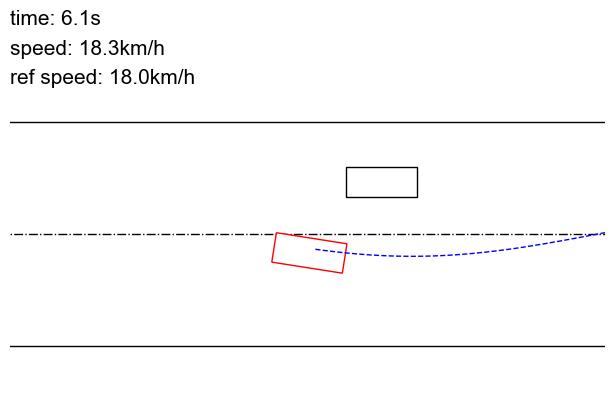

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.0752117782831192 



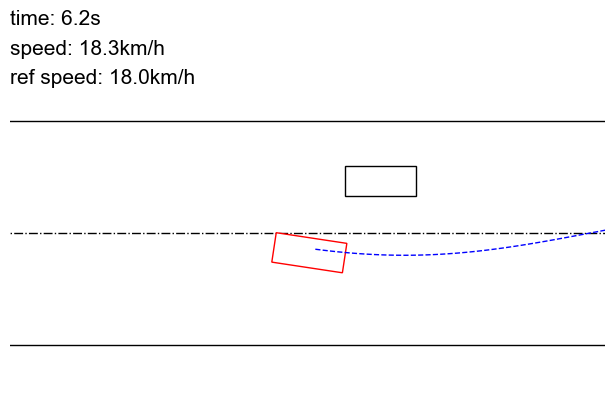

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.07533328980207443 



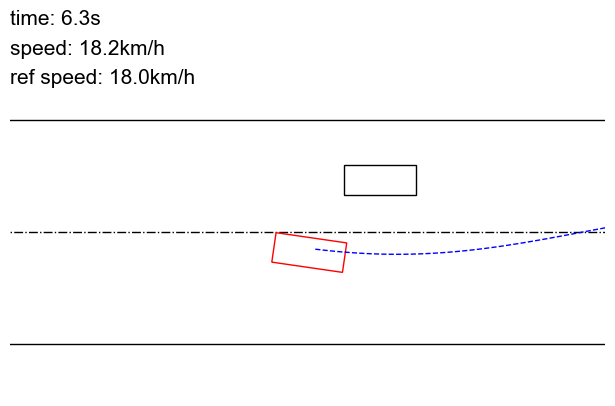

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.07512613385915756 



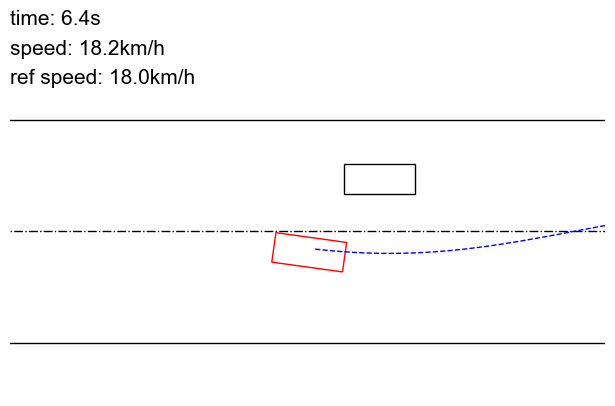

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.07459041476249695 



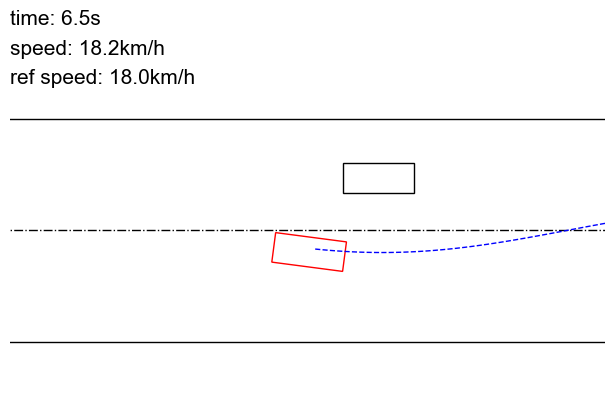

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 10
* Constraint calls: 22
* System simulations: 32
* Final cost: 0.07372734695672989 



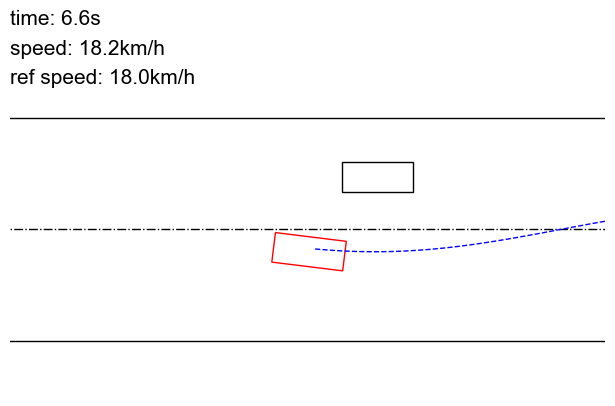

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.07254727929830551 



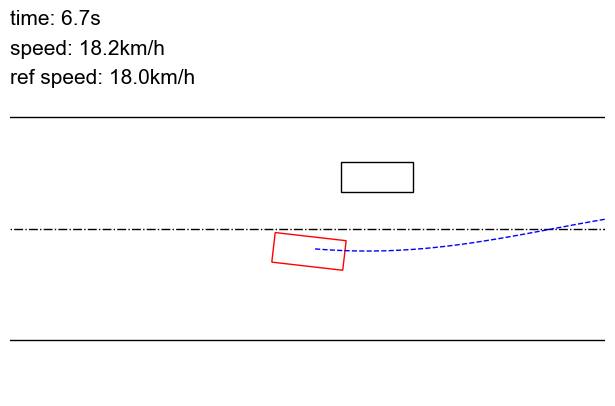

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 10
* Constraint calls: 22
* System simulations: 32
* Final cost: 0.07203468680381775 



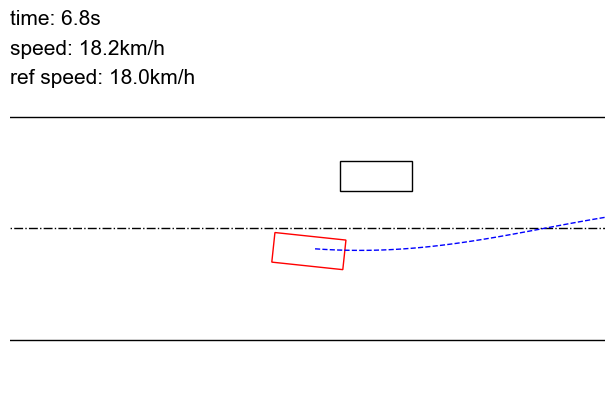

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 10
* Constraint calls: 22
* System simulations: 32
* Final cost: 0.0729948952794075 



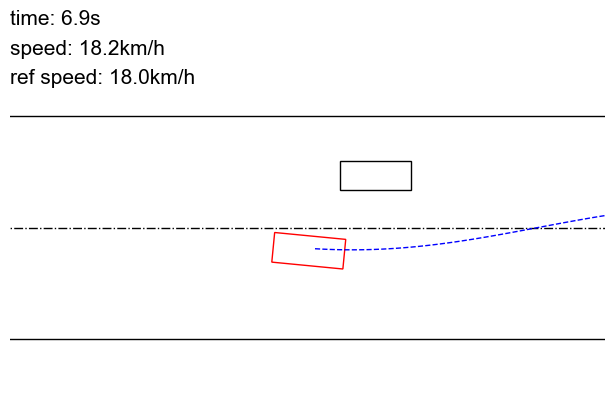

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.07517893612384796 



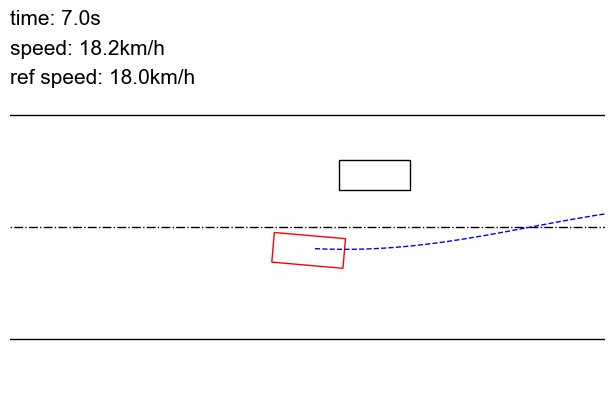

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 10
* Constraint calls: 20
* System simulations: 30
* Final cost: 0.0783836841583252 



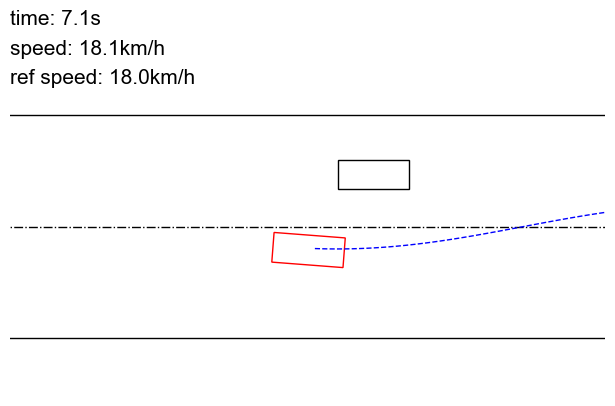

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.08237196505069733 



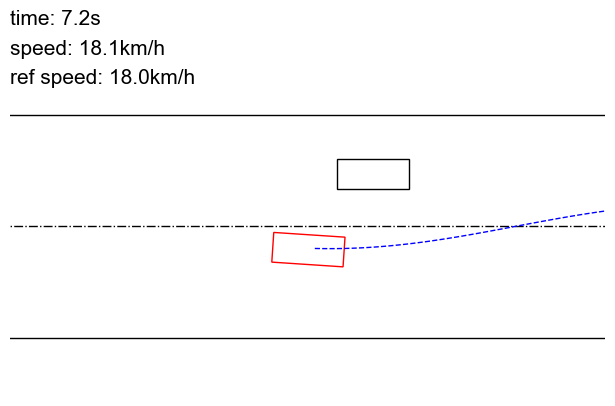

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.08688072860240936 



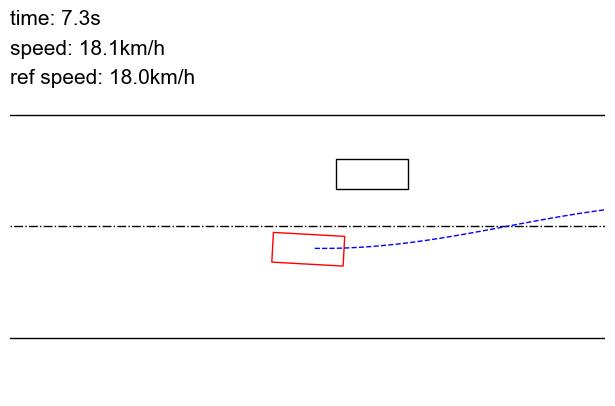

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 11
* Constraint calls: 24
* System simulations: 35
* Final cost: 0.0916871577501297 



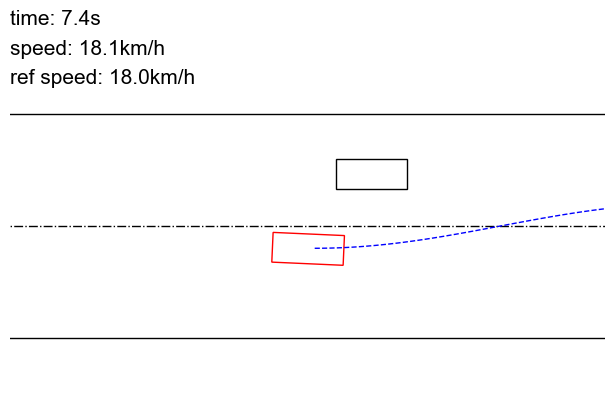

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.09656350314617157 



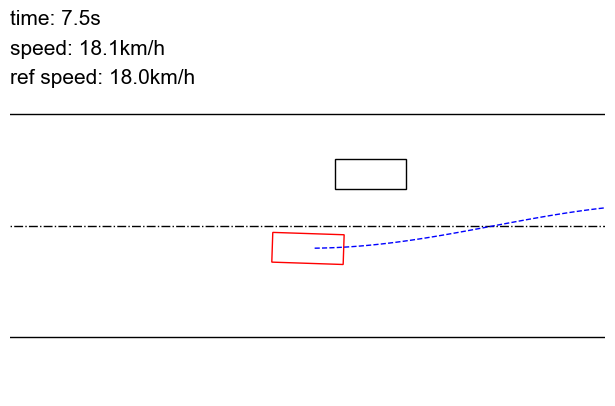

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 11
* Constraint calls: 25
* System simulations: 36
* Final cost: 0.10164864361286163 



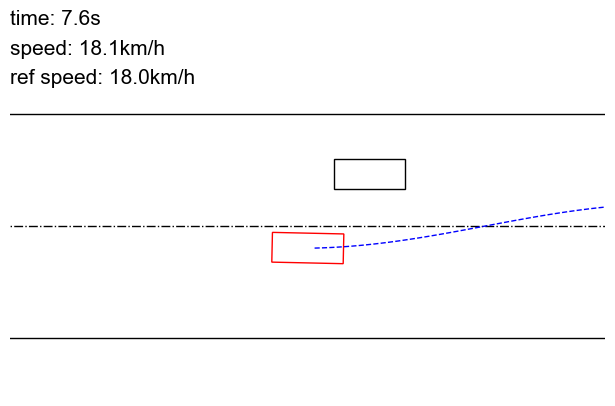

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.10748164355754852 



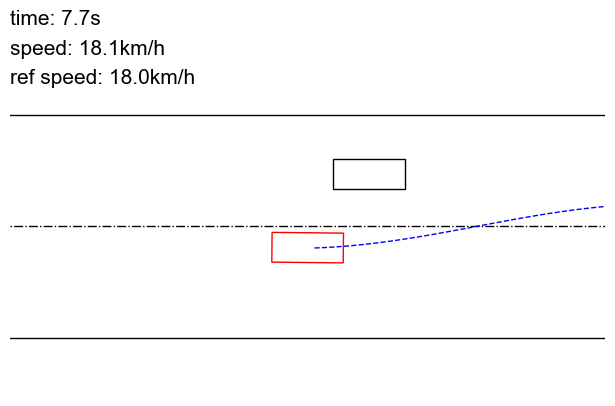

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.11418850719928741 



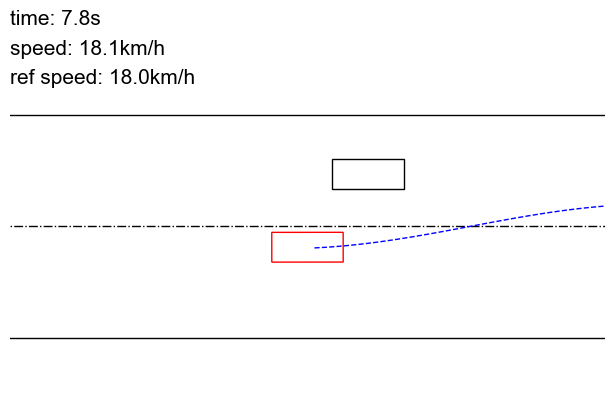

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.12180118262767792 



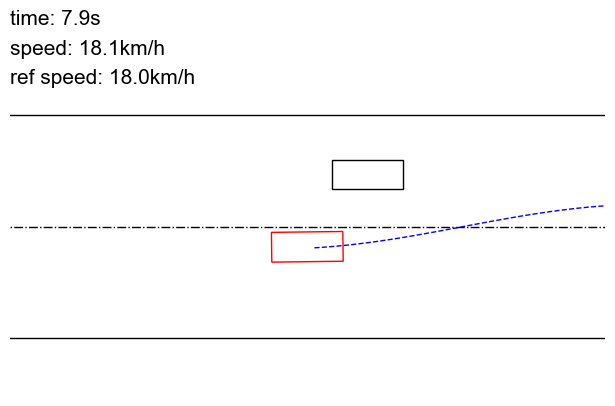

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.13027647137641907 



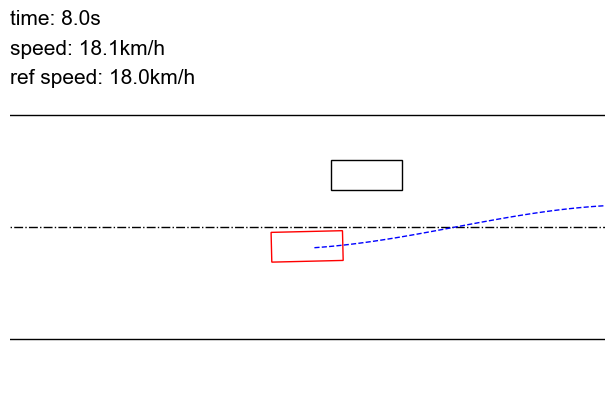

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.13953617215156555 



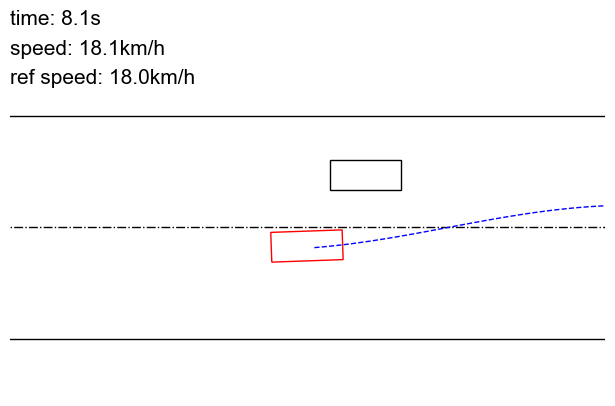

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.14943672716617584 



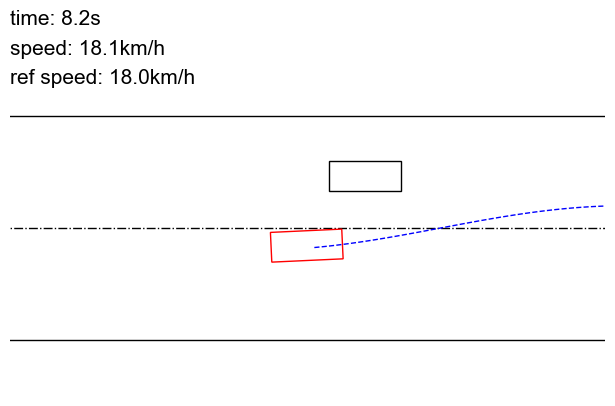

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.15980201959609985 



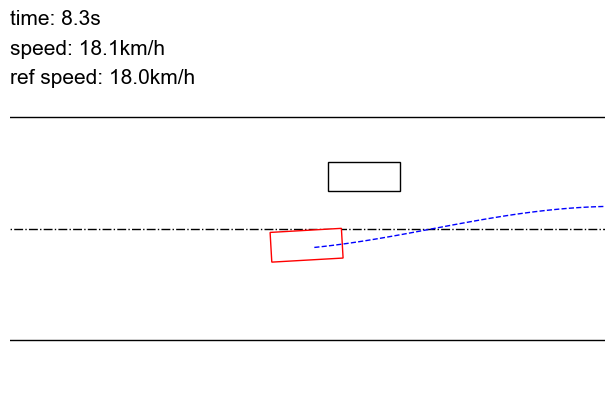

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.17044612765312195 



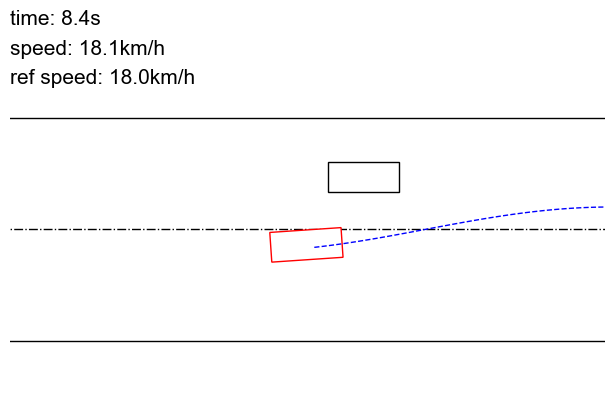

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.18117836117744446 



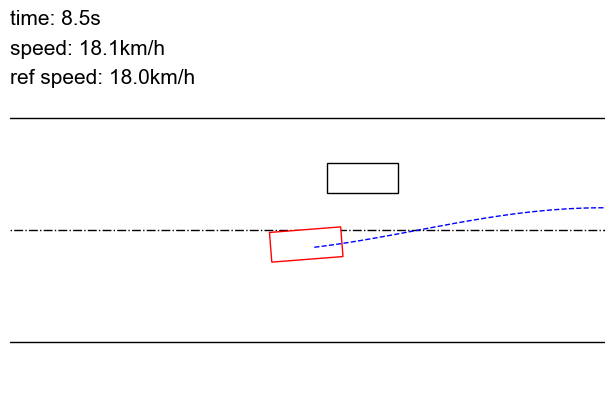

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.19179537892341614 



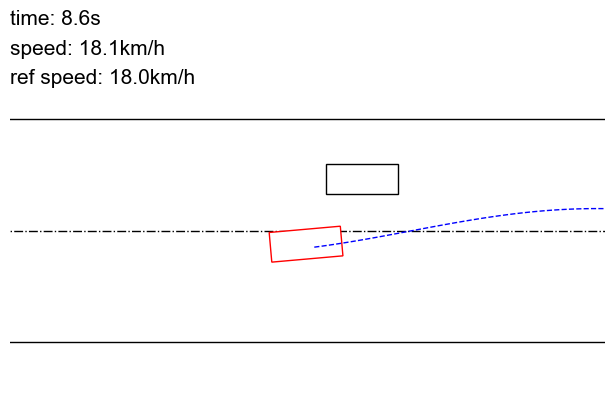

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.20211321115493774 



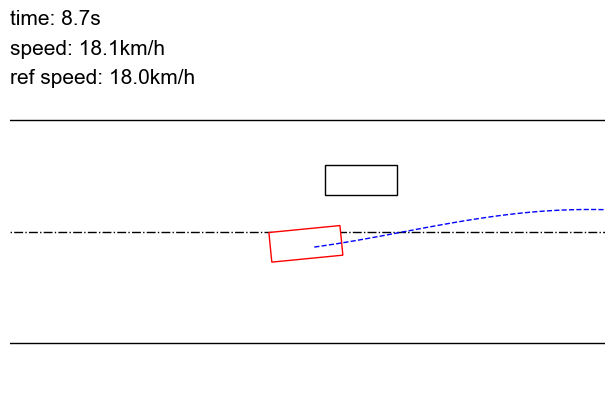

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.21192944049835205 



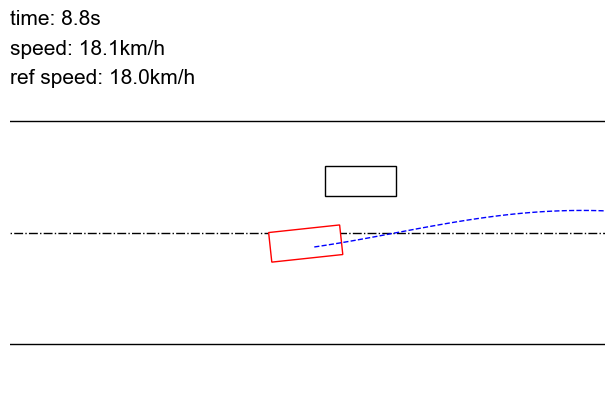

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.2211395800113678 



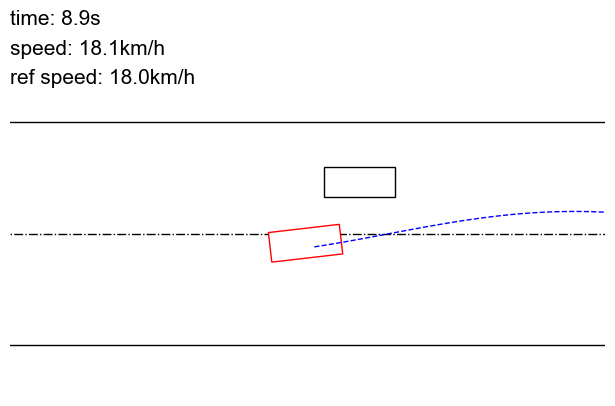

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.22983655333518982 



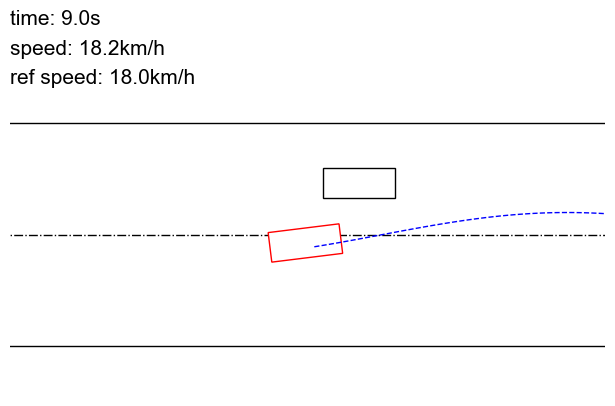

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 14
* Cost function calls: 15
* Constraint calls: 33
* System simulations: 48
* Final cost: 0.23896919190883636 



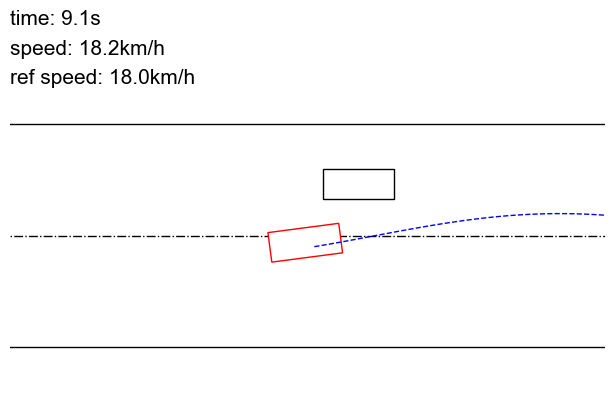

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 19
* Cost function calls: 20
* Constraint calls: 43
* System simulations: 63
* Final cost: 0.24823042750358582 



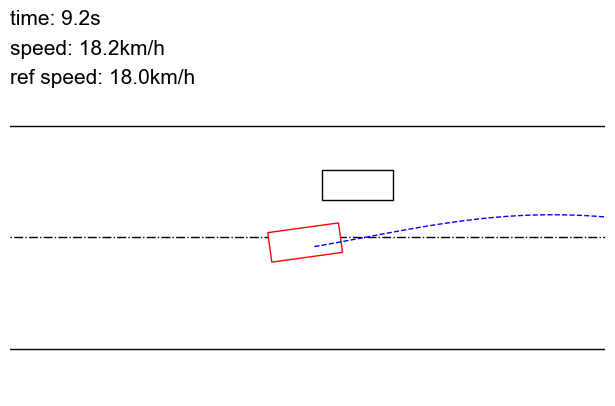

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 13
* Cost function calls: 14
* Constraint calls: 31
* System simulations: 45
* Final cost: 0.2572565972805023 



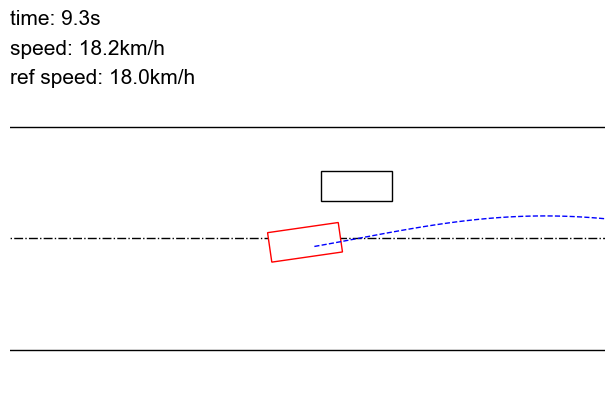

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.26574552059173584 



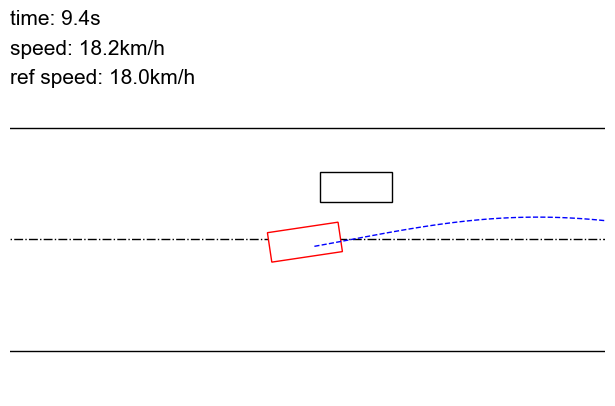

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.2734888195991516 



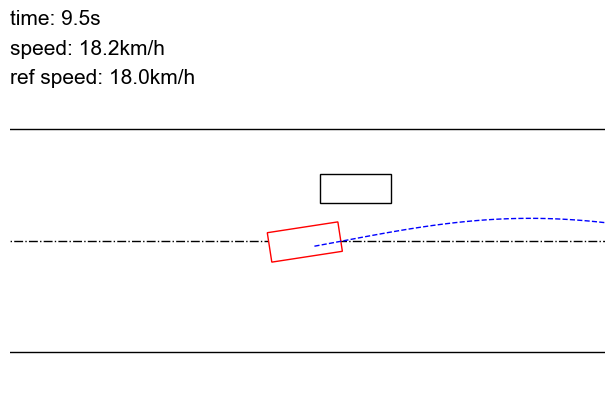

b'Maximum number of iterations exceeded (can be specified by an option).'
Summary statistics:
* Number of iterations: 200
* Cost function calls: 341
* Constraint calls: 545
* System simulations: 886
* Final cost: 0.28032156825065613 



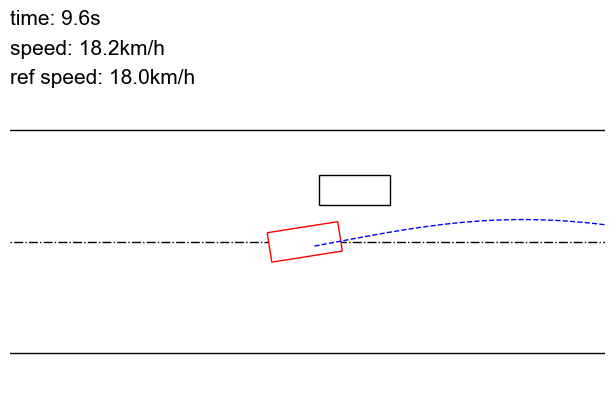

b'Maximum number of iterations exceeded (can be specified by an option).'
Summary statistics:
* Number of iterations: 200
* Cost function calls: 444
* Constraint calls: 648
* System simulations: 1092
* Final cost: 0.2909974455833435 



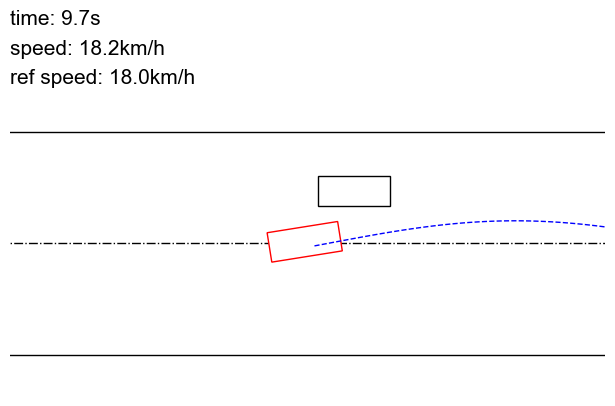

b"Restoration phase failed, algorithm doesn't know how to proceed."
Summary statistics:
* Number of iterations: 162
* Cost function calls: 236
* Constraint calls: 403
* System simulations: 639
* Final cost: 0.32105061411857605 



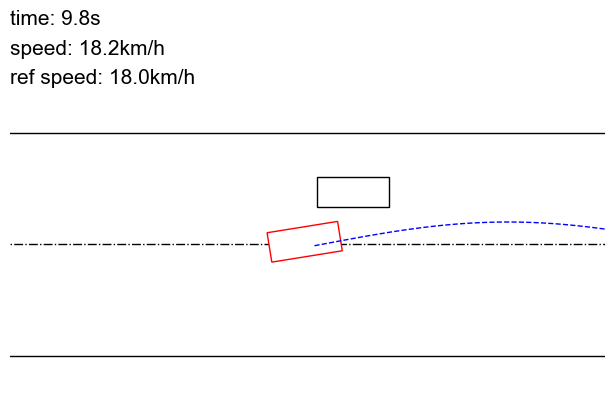

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 11
* Cost function calls: 13
* Constraint calls: 28
* System simulations: 41
* Final cost: 0.30135464668273926 



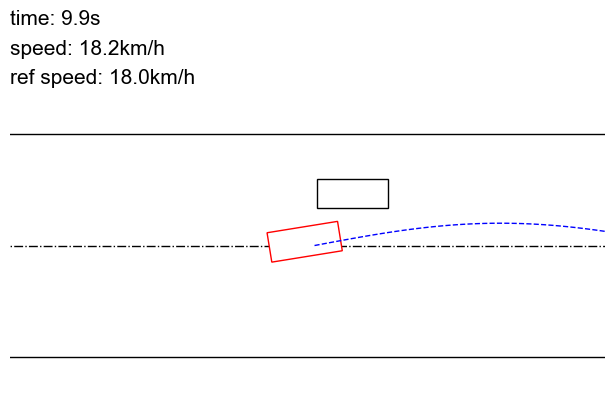

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.3070511519908905 



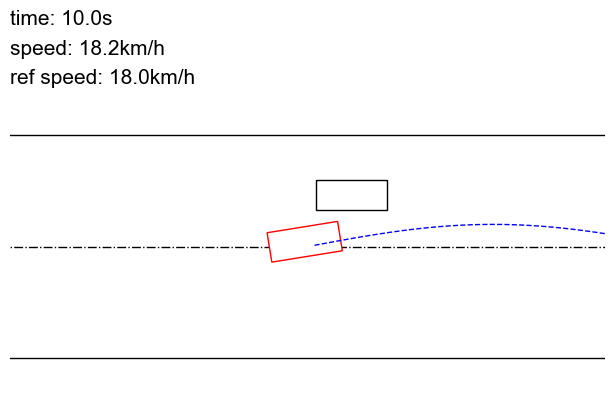

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.31144461035728455 



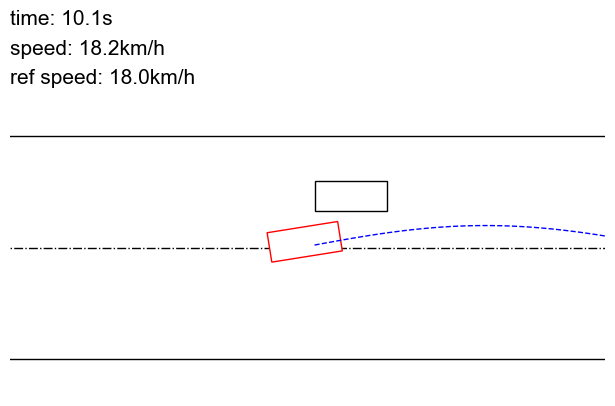

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.3146514892578125 



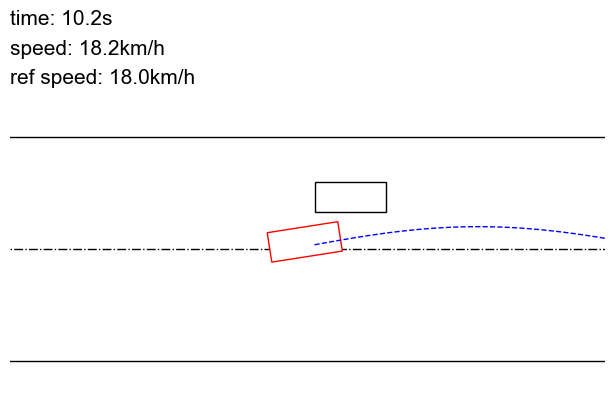

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.3173902630805969 



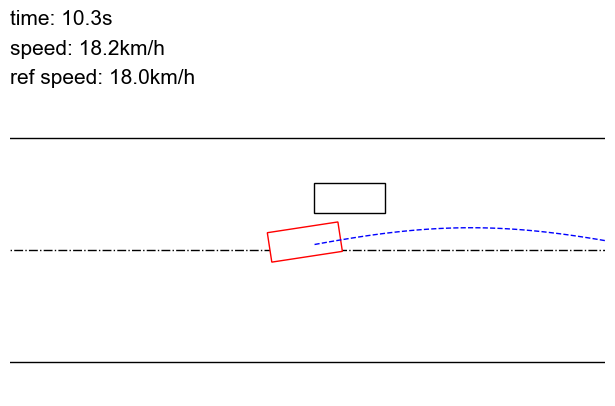

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.3198406994342804 



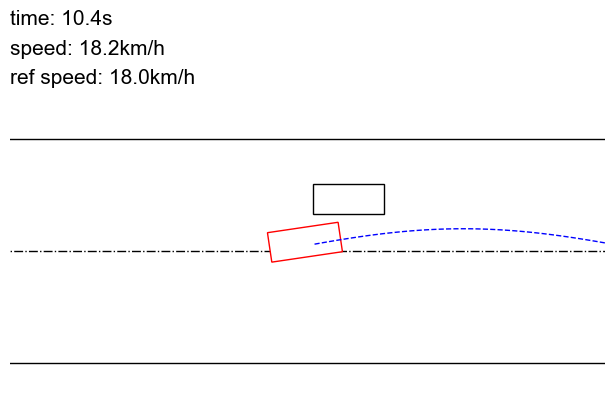

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.3221258223056793 



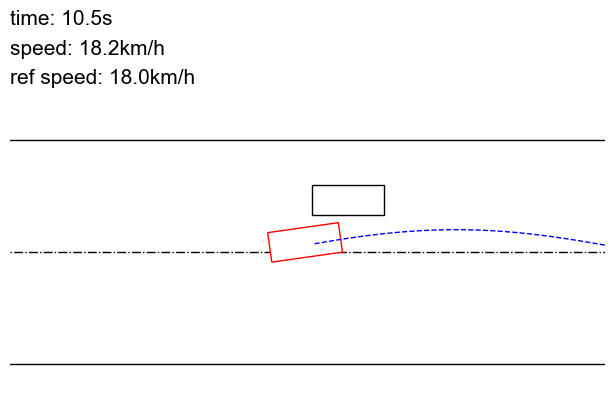

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 19
* Cost function calls: 20
* Constraint calls: 43
* System simulations: 63
* Final cost: 0.3242589235305786 



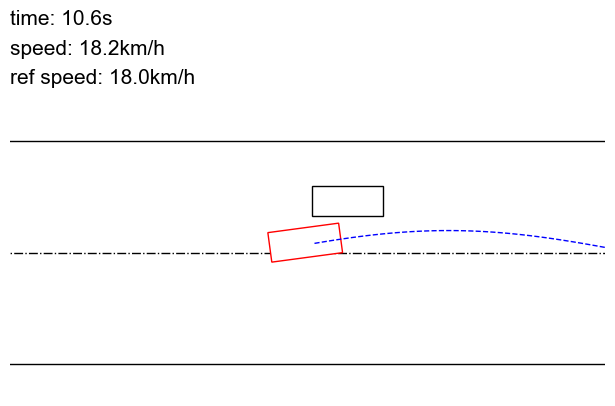

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.32617855072021484 



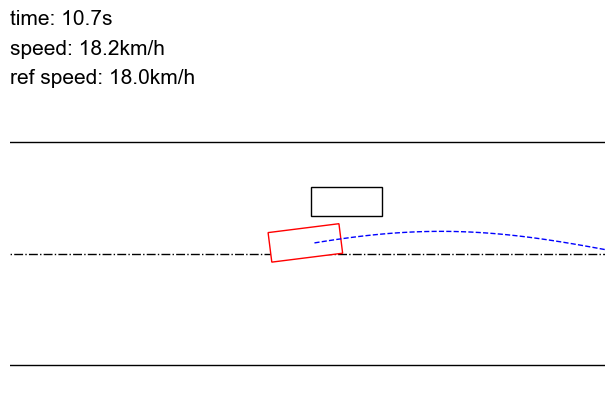

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 16
* Cost function calls: 17
* Constraint calls: 37
* System simulations: 54
* Final cost: 0.3282179534435272 



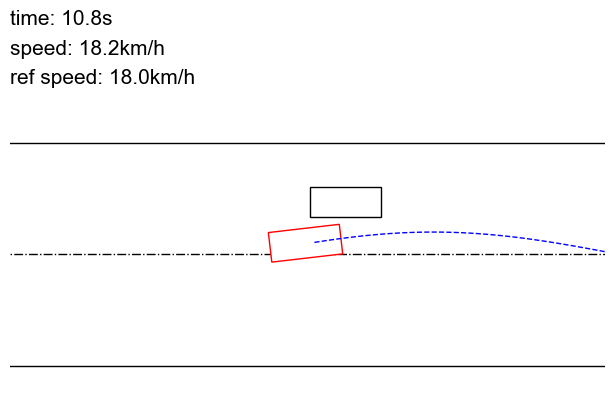

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.328700989484787 



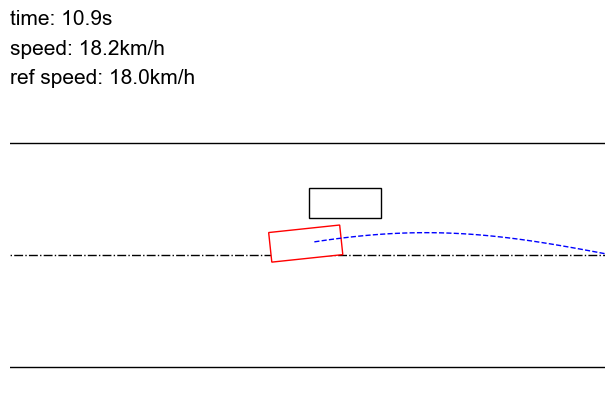

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.32882481813430786 



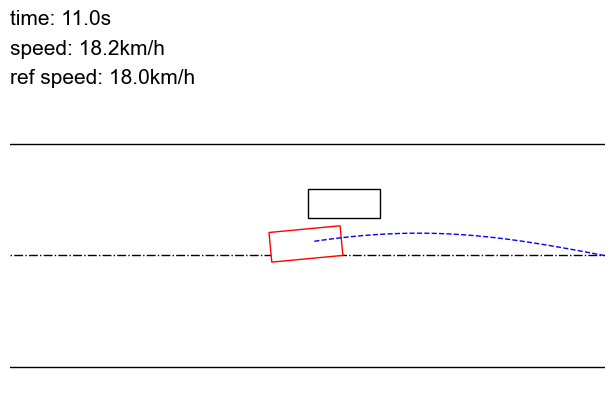

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.32784903049468994 



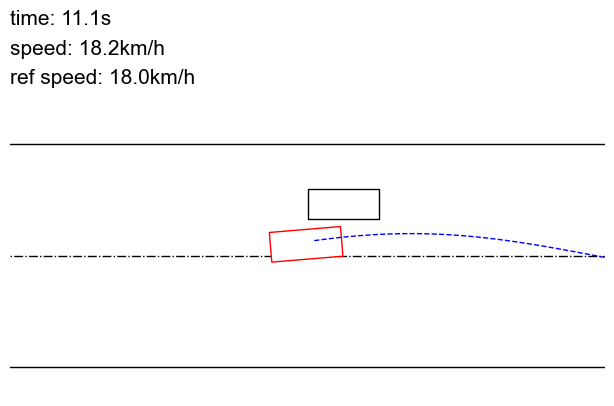

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.3261254131793976 



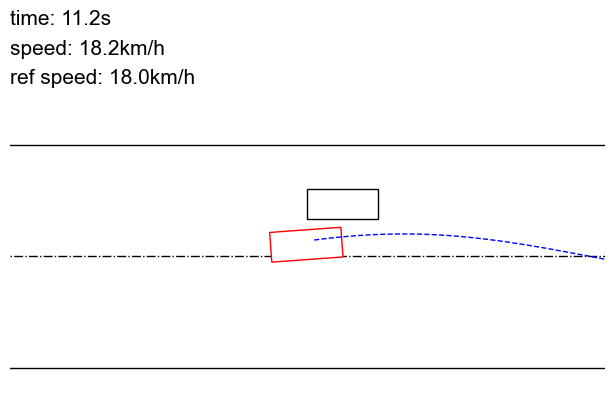

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.32413434982299805 



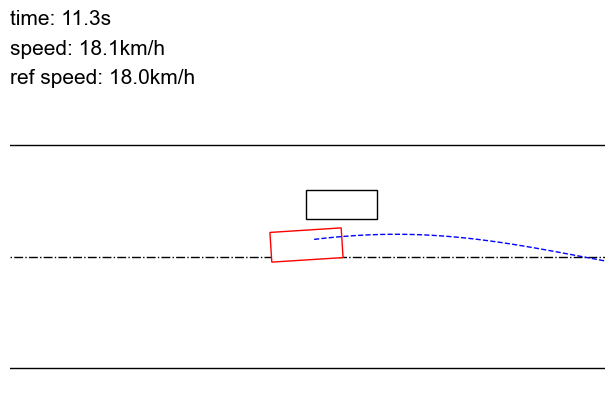

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.32102832198143005 



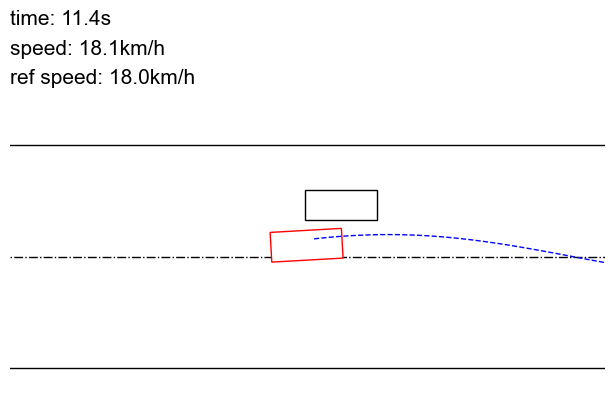

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.3164370656013489 



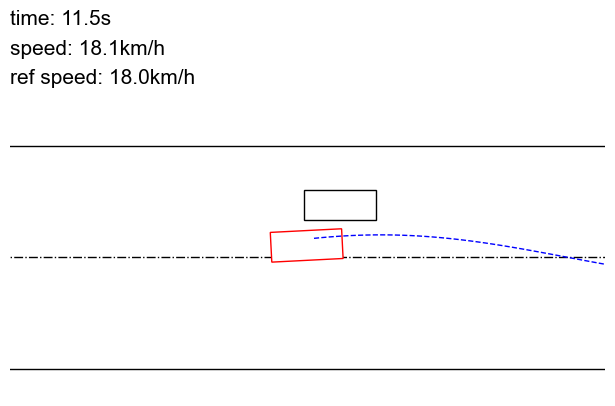

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.31013303995132446 



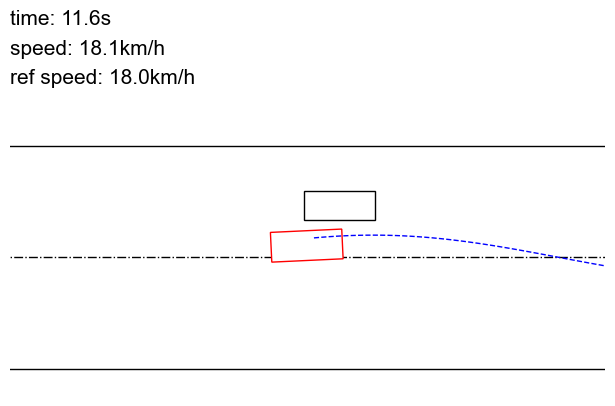

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 11
* Constraint calls: 25
* System simulations: 36
* Final cost: 0.3020182251930237 



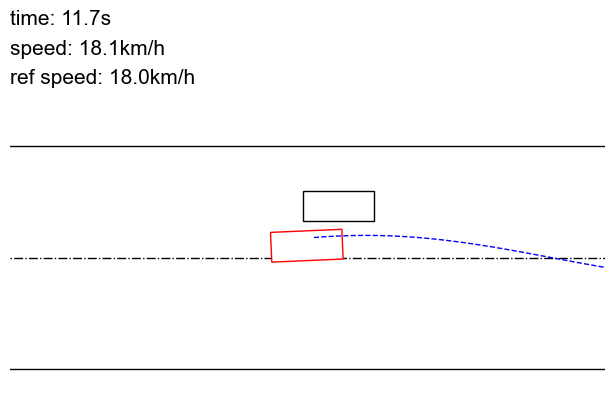

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 13
* Cost function calls: 15
* Constraint calls: 32
* System simulations: 47
* Final cost: 0.29208284616470337 



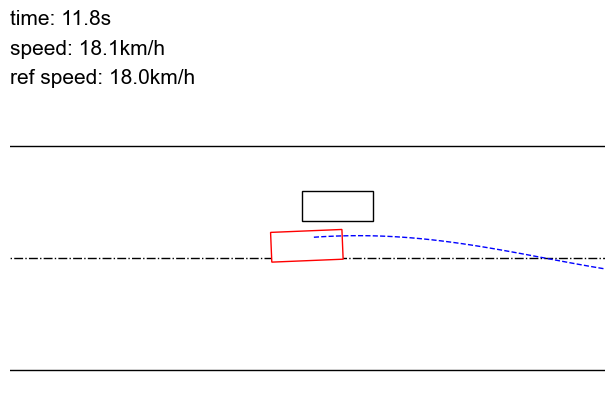

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 12
* Constraint calls: 26
* System simulations: 38
* Final cost: 0.2804086208343506 



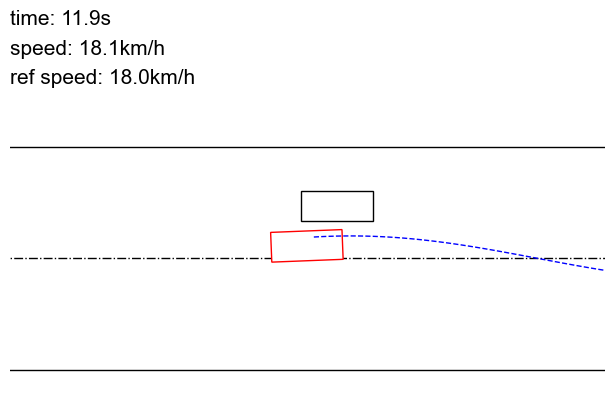

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 11
* Constraint calls: 25
* System simulations: 36
* Final cost: 0.2671729326248169 



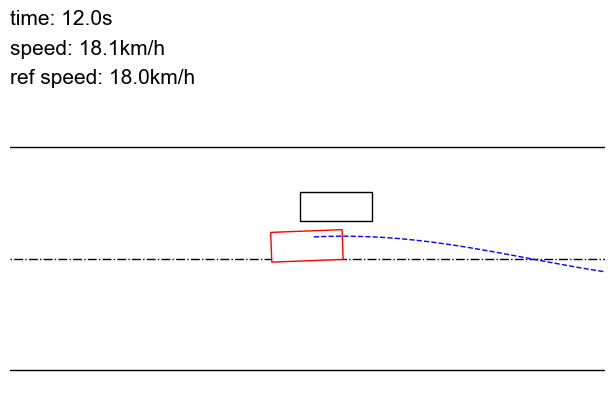

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 11
* Constraint calls: 25
* System simulations: 36
* Final cost: 0.25260668992996216 



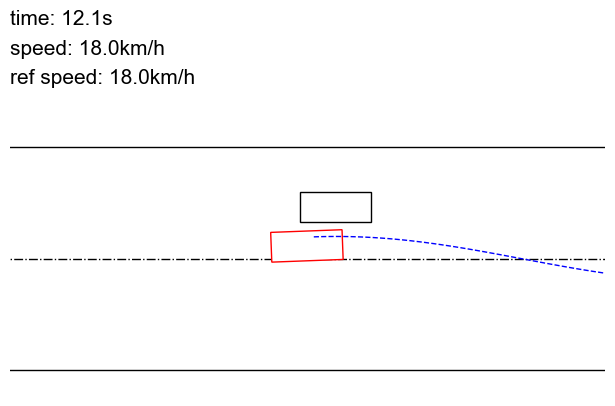

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 11
* Constraint calls: 25
* System simulations: 36
* Final cost: 0.23700016736984253 



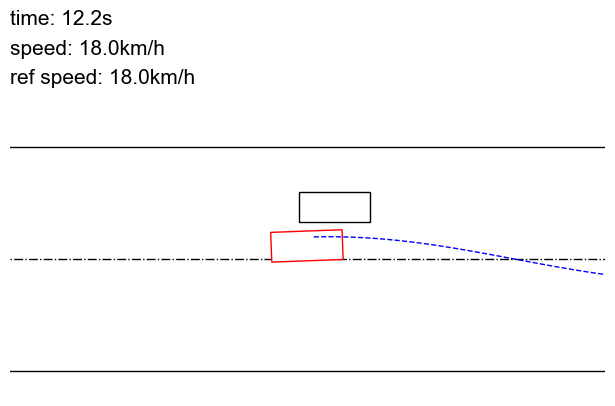

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.22067967057228088 



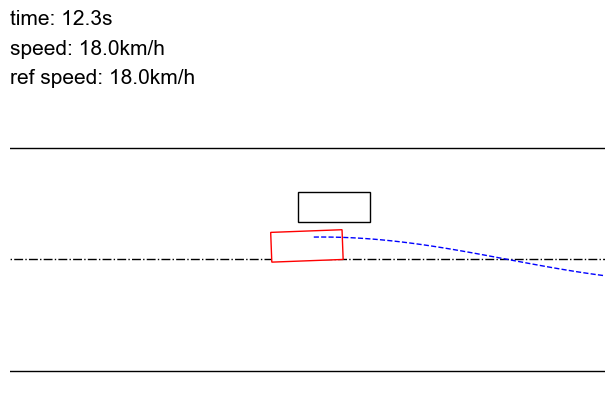

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.20400236546993256 



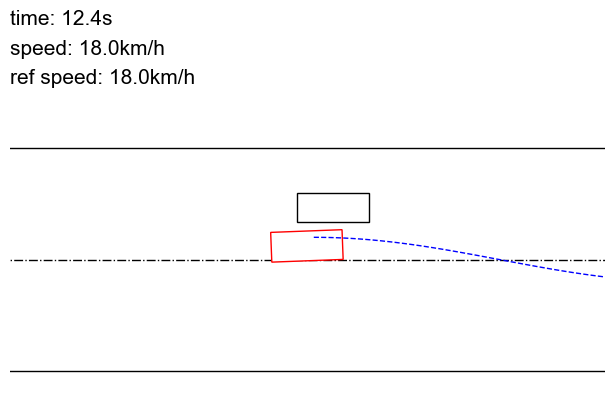

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 13
* Constraint calls: 26
* System simulations: 39
* Final cost: 0.18734759092330933 



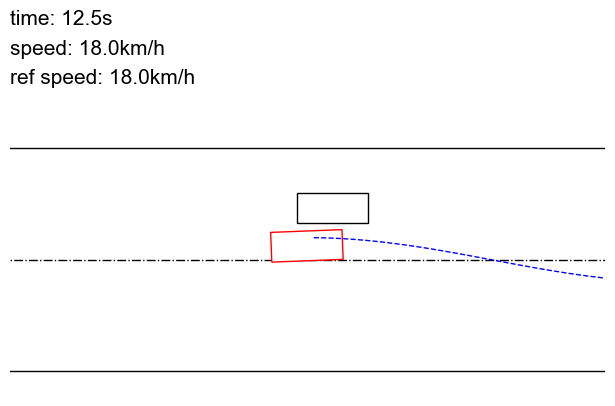

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.1710973083972931 



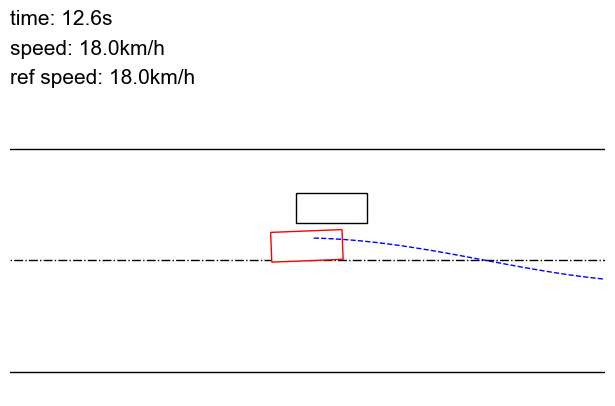

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 10
* Constraint calls: 22
* System simulations: 32
* Final cost: 0.15562467277050018 



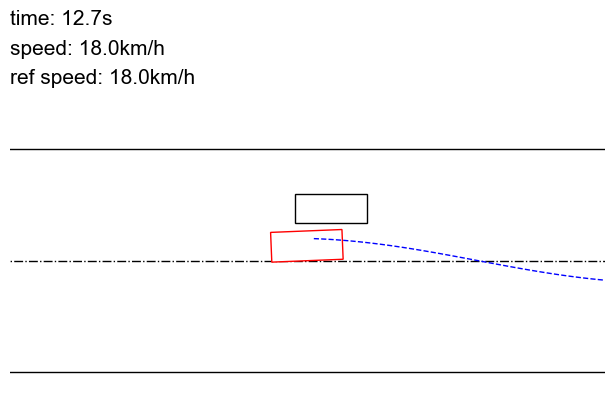

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 12
* Constraint calls: 26
* System simulations: 38
* Final cost: 0.14123369753360748 



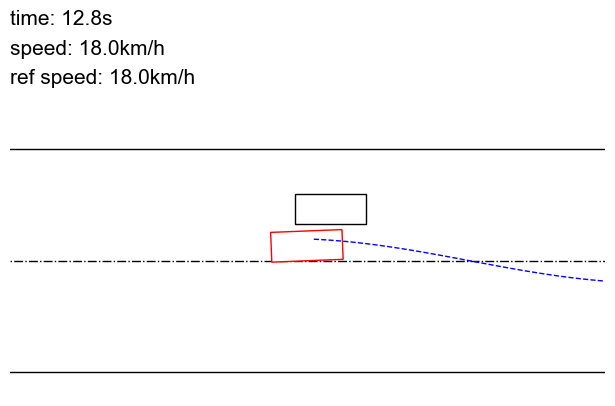

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.12790074944496155 



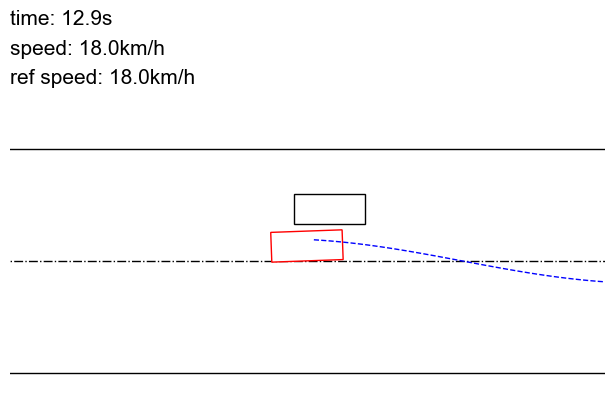

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.11552926152944565 



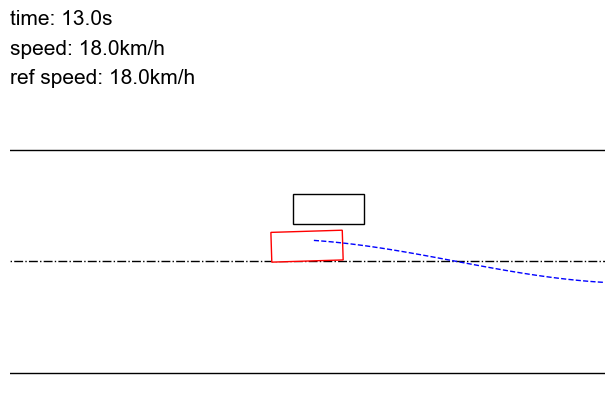

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.10406866669654846 



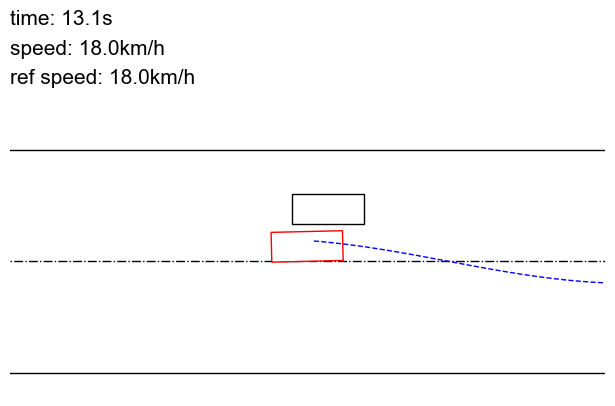

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.09354002773761749 



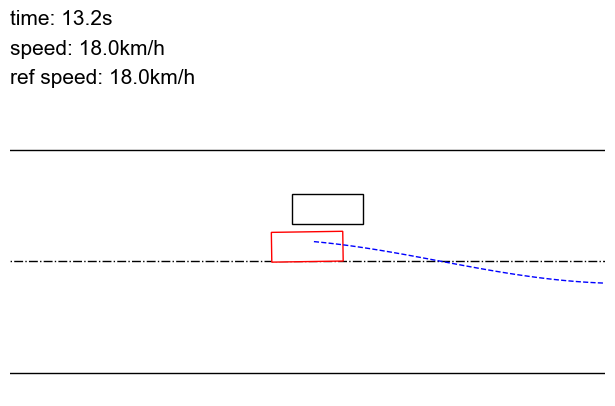

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 10
* Constraint calls: 21
* System simulations: 31
* Final cost: 0.08390985429286957 



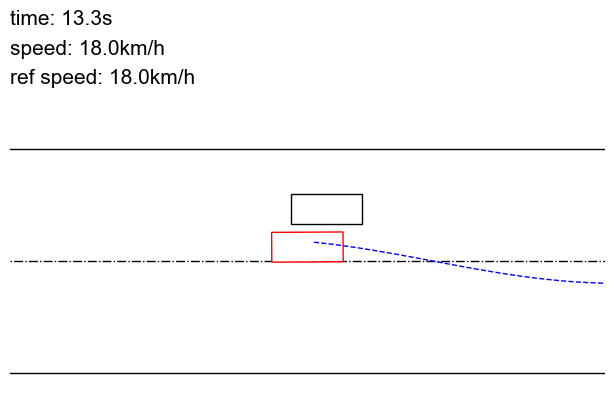

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.07531113922595978 



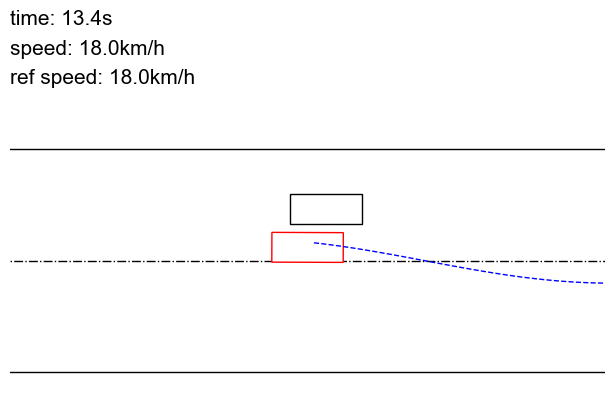

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.06781795620918274 



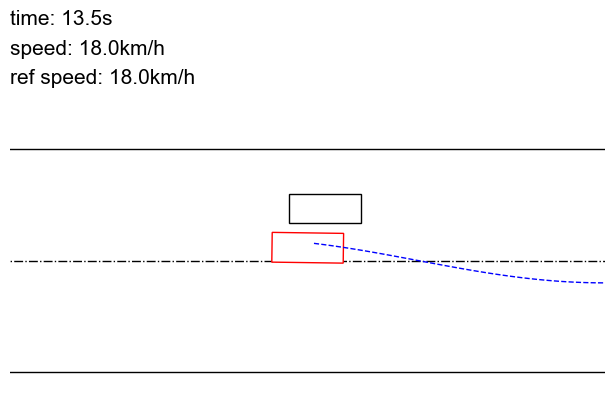

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 11
* Constraint calls: 22
* System simulations: 33
* Final cost: 0.061490003019571304 



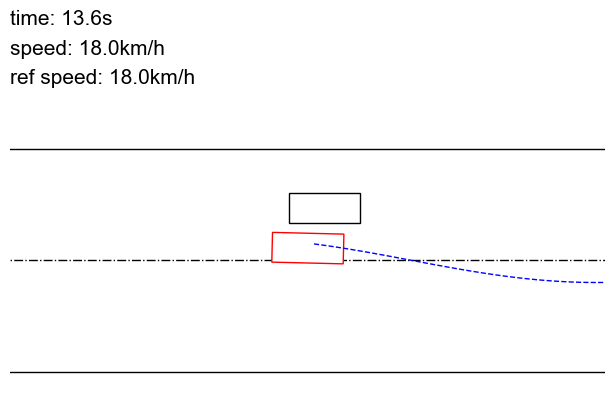

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 10
* Constraint calls: 21
* System simulations: 31
* Final cost: 0.056215688586235046 



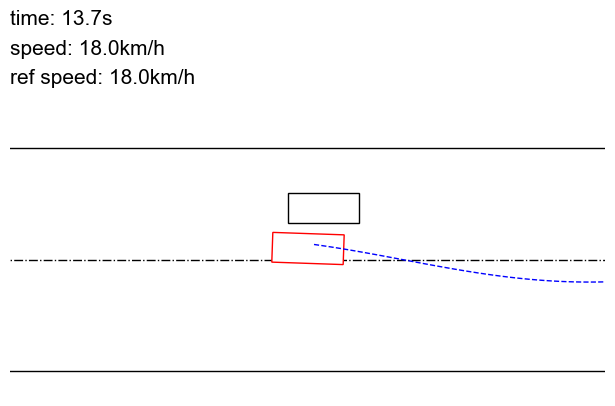

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.05179242417216301 



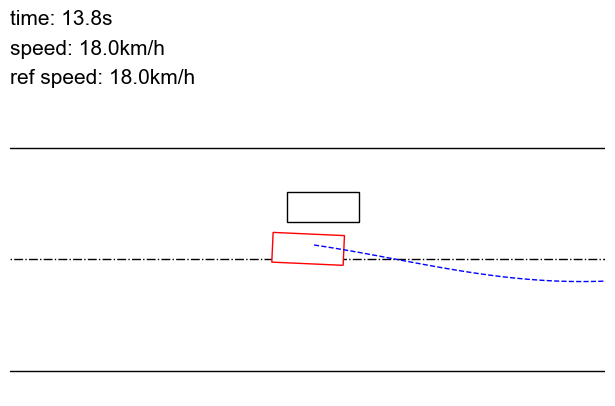

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.048113513737916946 



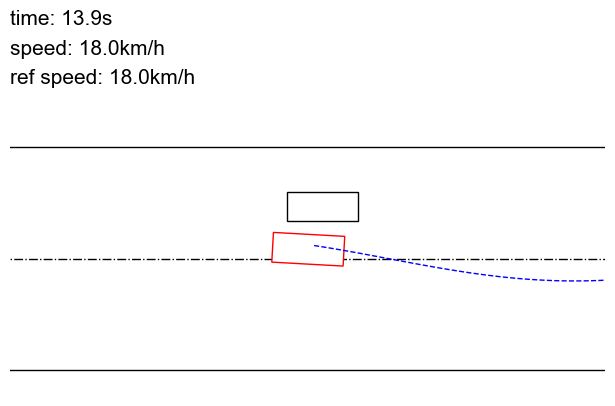

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.04511864483356476 



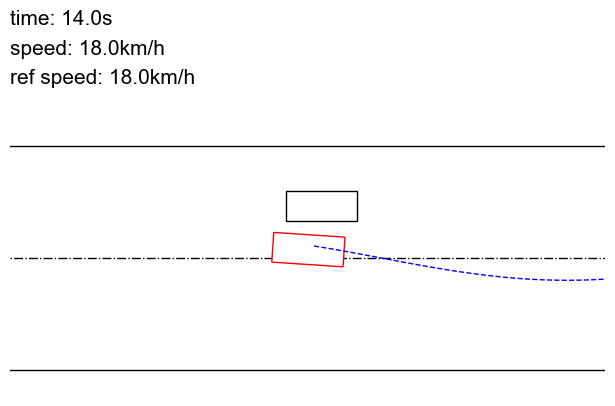

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.04280082508921623 



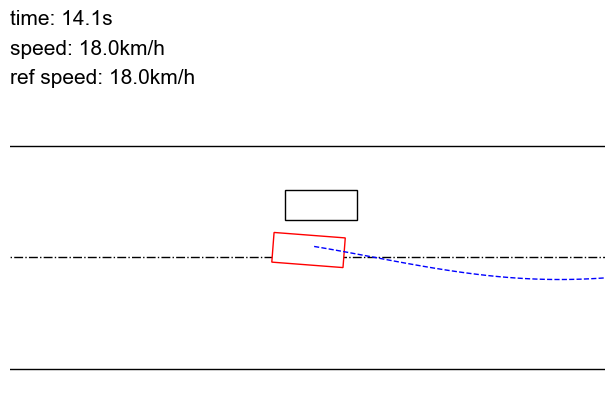

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.041148606687784195 



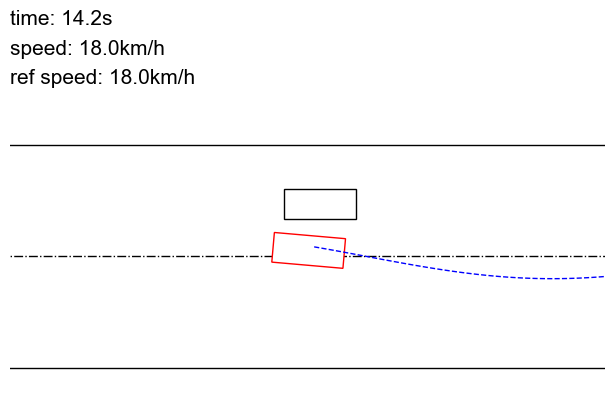

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.04014154151082039 



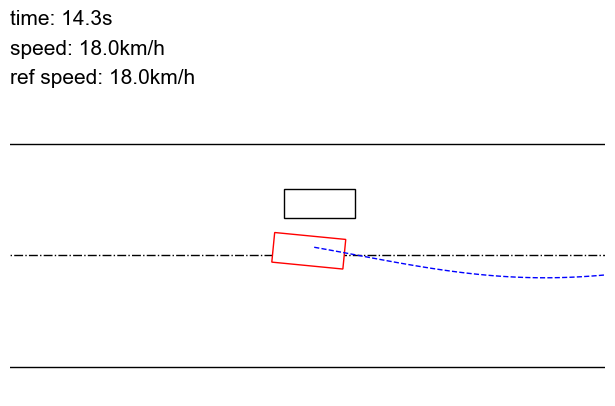

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.039759568870067596 



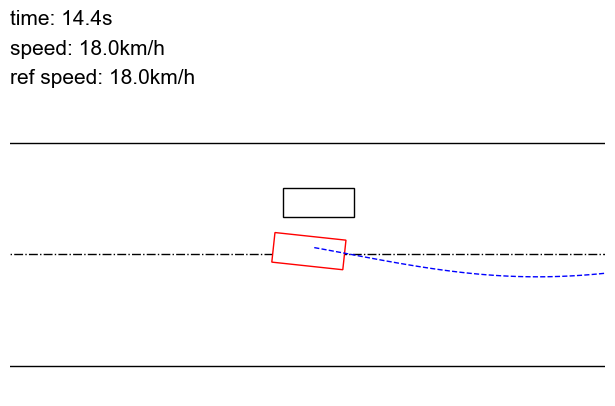

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.03996400907635689 



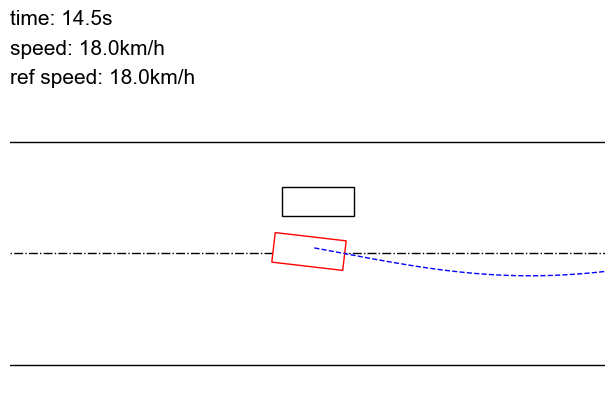

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.04071297496557236 



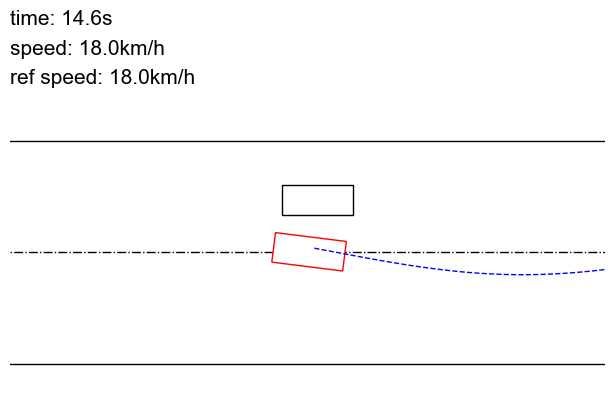

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.04195399582386017 



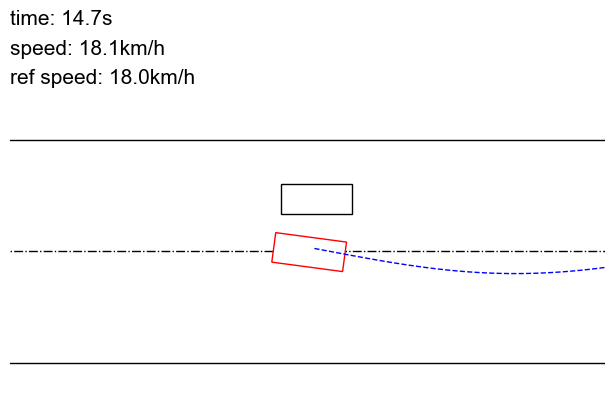

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.043624937534332275 



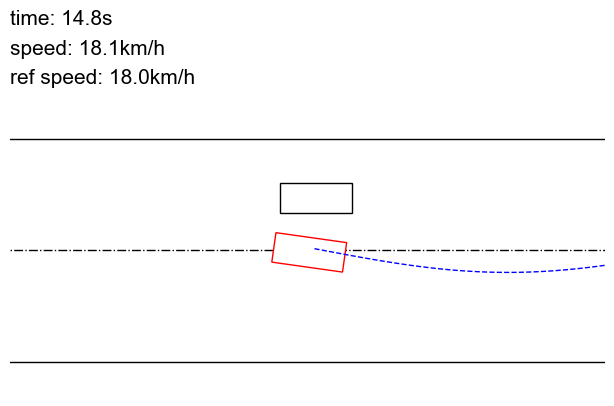

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.04566183686256409 



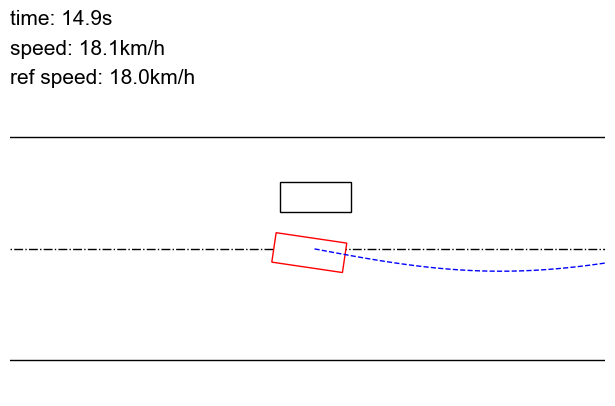

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 10
* Constraint calls: 20
* System simulations: 30
* Final cost: 0.04800989106297493 



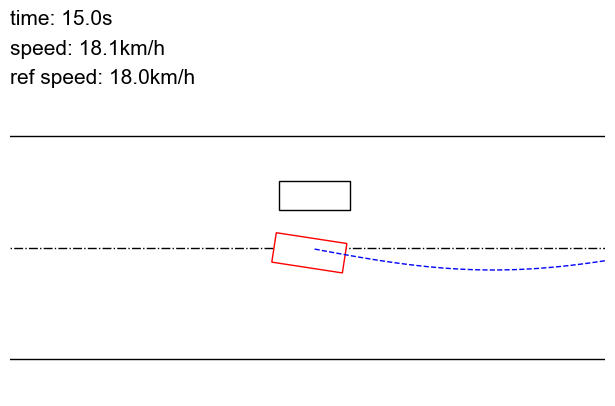

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 10
* Constraint calls: 20
* System simulations: 30
* Final cost: 0.050568196922540665 



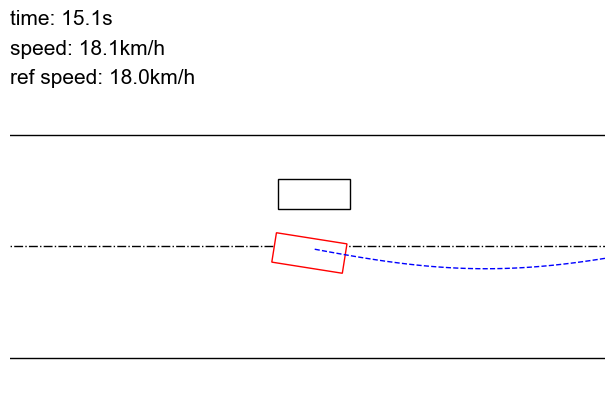

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 10
* Constraint calls: 19
* System simulations: 29
* Final cost: 0.05327921733260155 



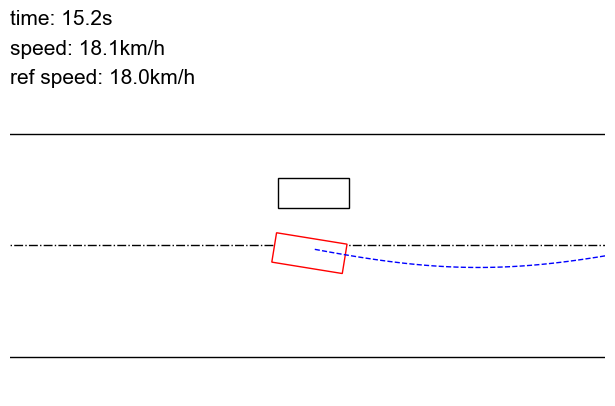

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.05607681721448898 



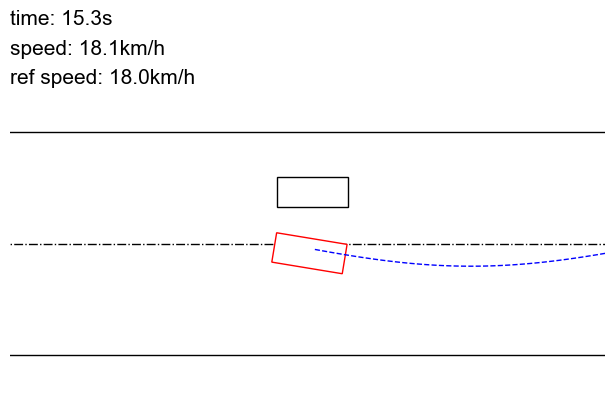

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.05887974053621292 



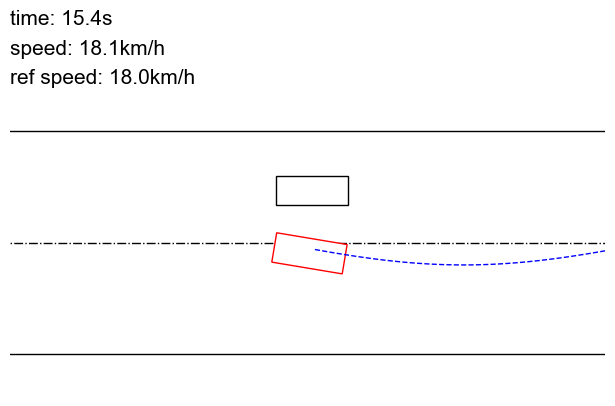

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 10
* Constraint calls: 20
* System simulations: 30
* Final cost: 0.06162578612565994 



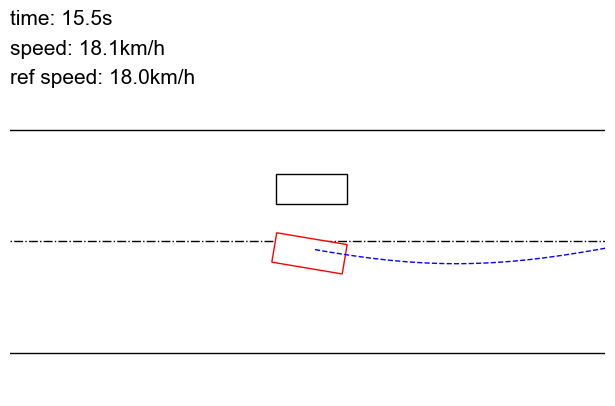

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 13
* Constraint calls: 23
* System simulations: 36
* Final cost: 0.06424935907125473 



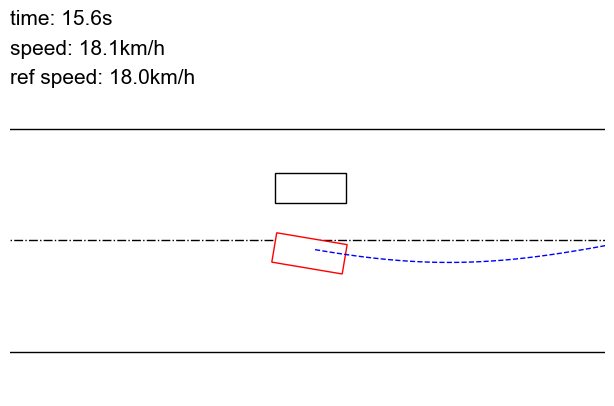

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.06669574975967407 



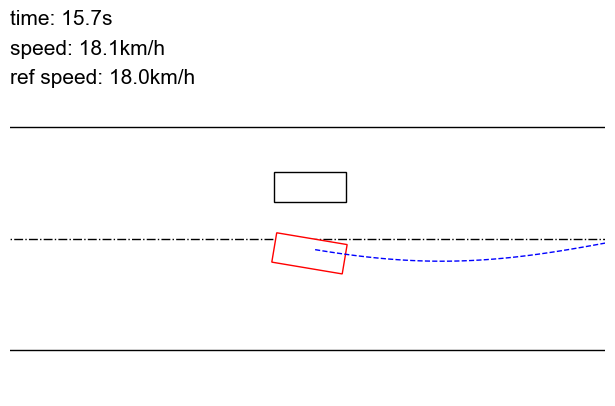

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 10
* Constraint calls: 20
* System simulations: 30
* Final cost: 0.06891072541475296 



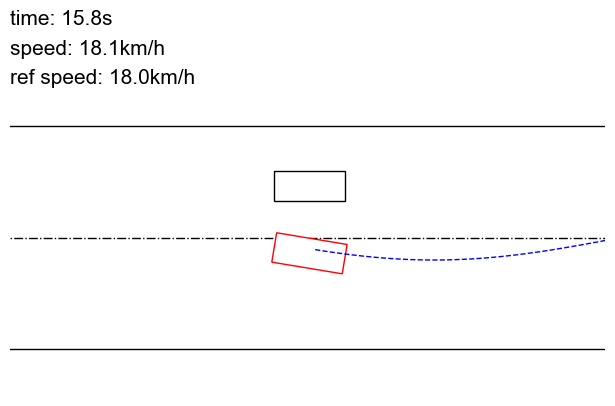

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.07084950804710388 



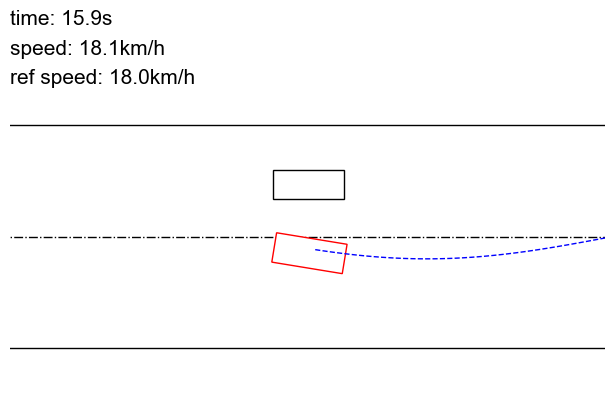

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.07247547060251236 



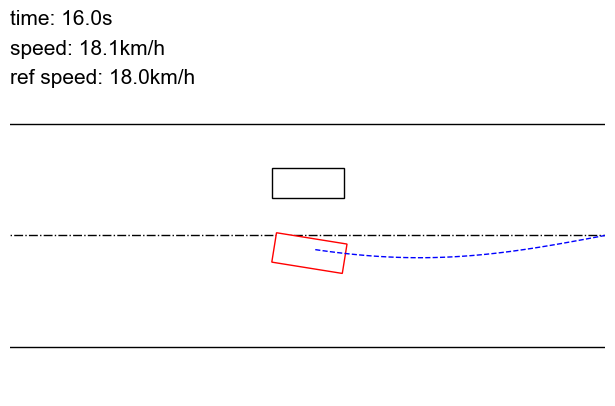

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.0737559124827385 



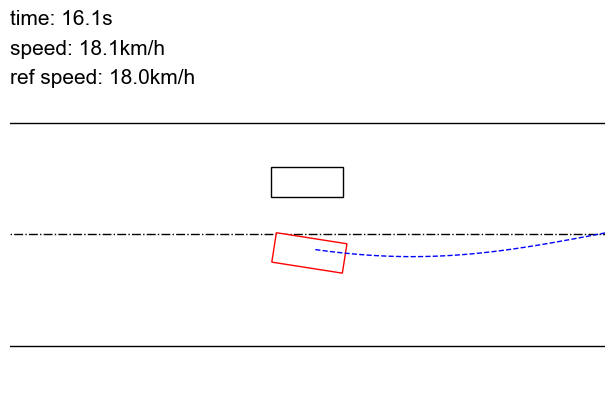

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 11
* Constraint calls: 20
* System simulations: 31
* Final cost: 0.07467016577720642 



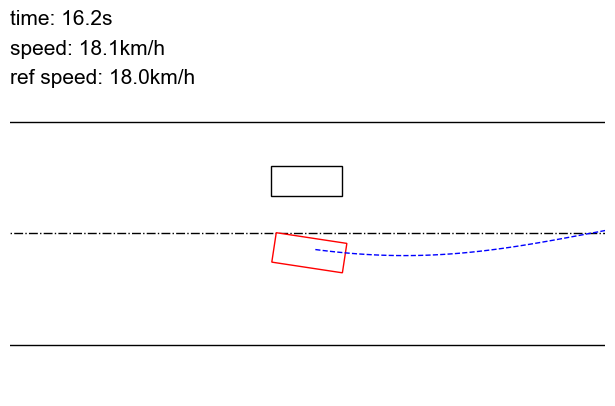

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.07519914209842682 



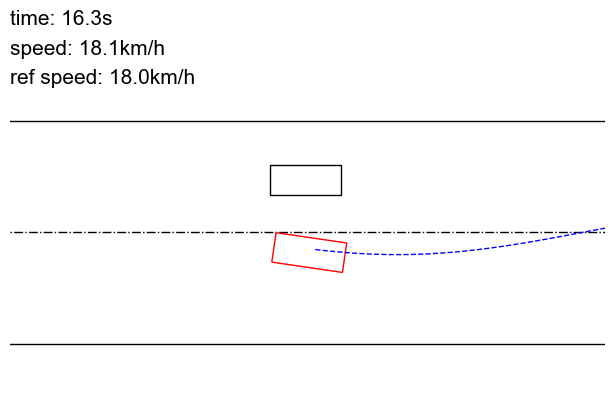

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.07533001899719238 



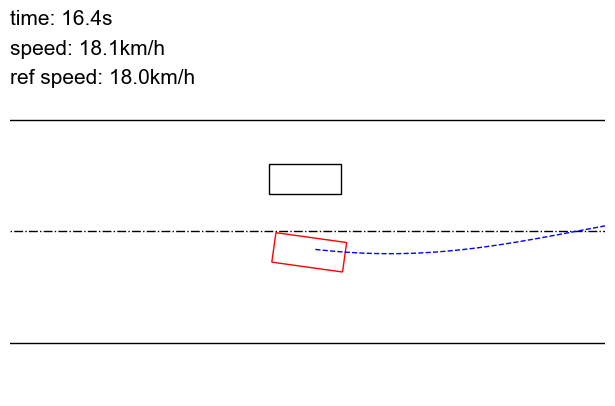

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.07507000863552094 



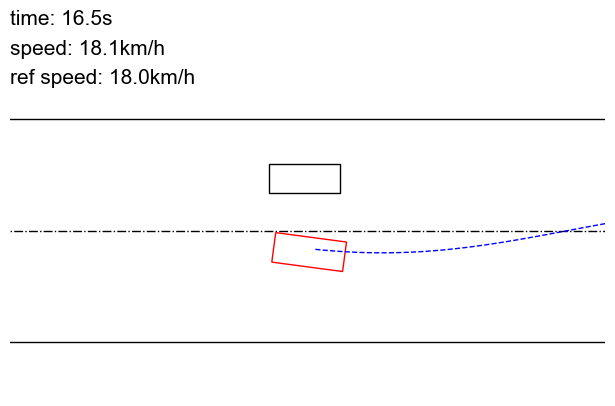

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 9
* Constraint calls: 19
* System simulations: 28
* Final cost: 0.07441725581884384 



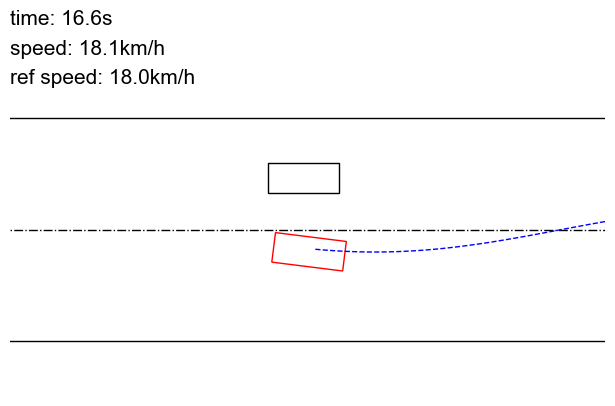

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.0733870267868042 



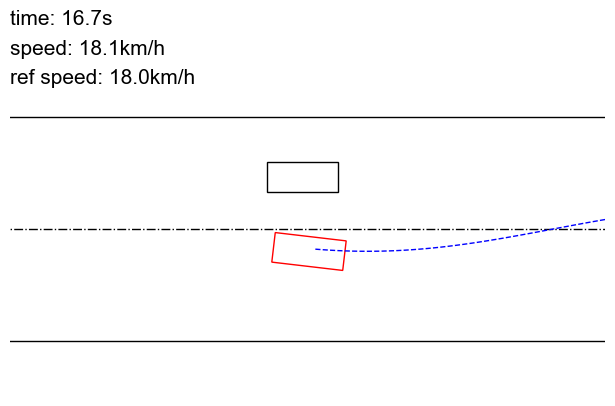

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.07200013101100922 



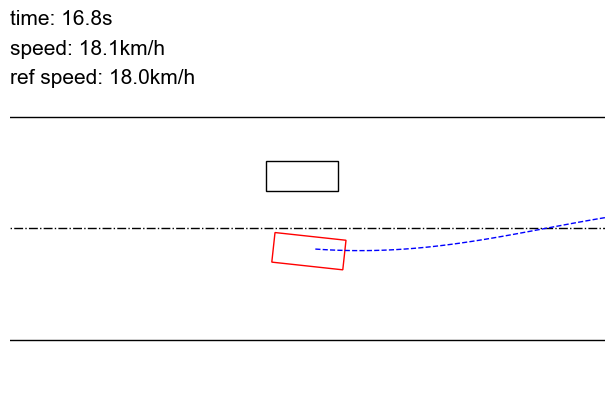

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.07027680426836014 



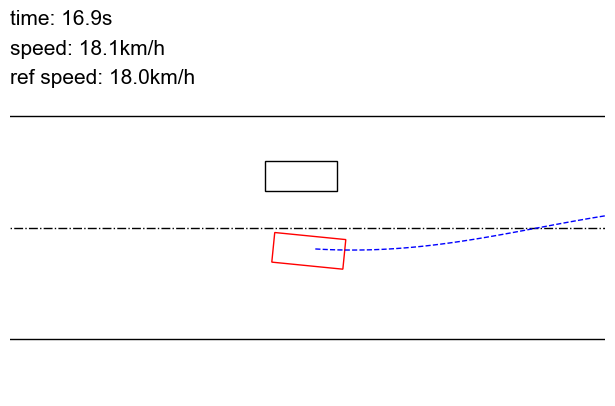

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 7
* Constraint calls: 15
* System simulations: 22
* Final cost: 0.06824368983507156 



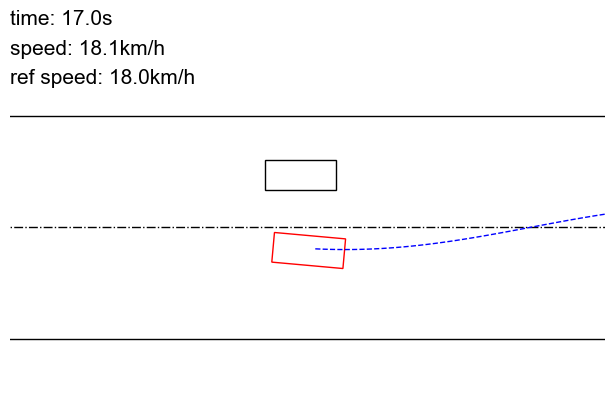

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.06595135480165482 



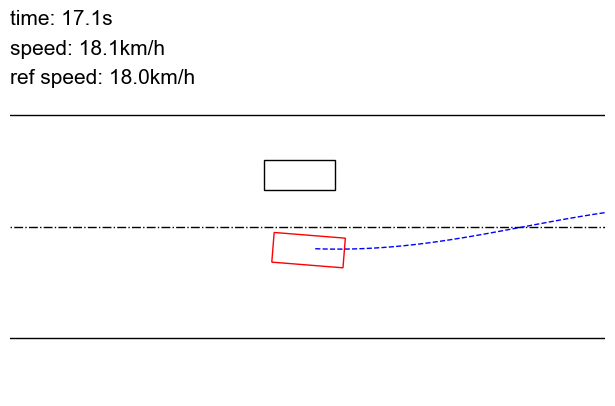

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 8
* Constraint calls: 17
* System simulations: 25
* Final cost: 0.06341183185577393 



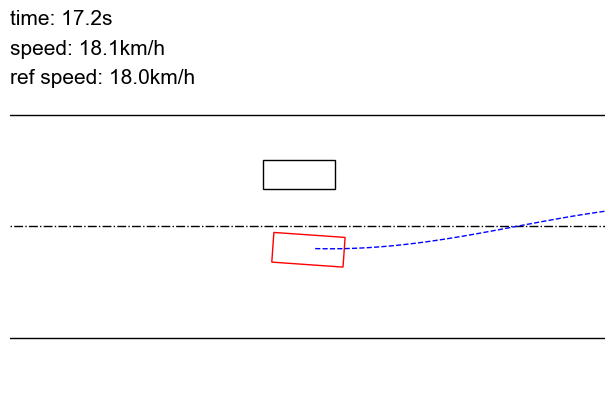

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.06290983408689499 



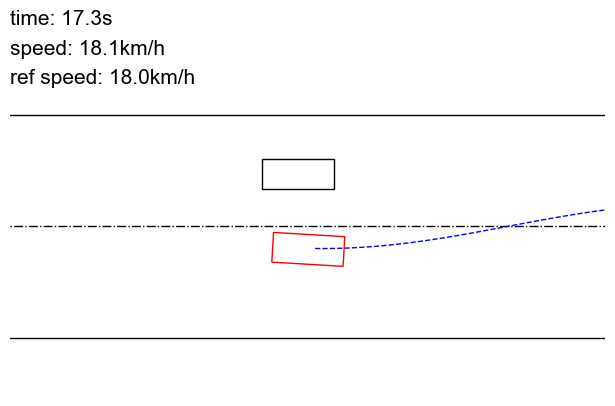

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 10
* Constraint calls: 22
* System simulations: 32
* Final cost: 0.06595339626073837 



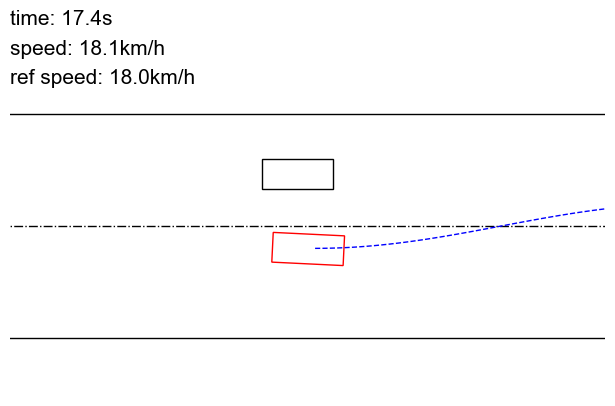

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.07207466661930084 



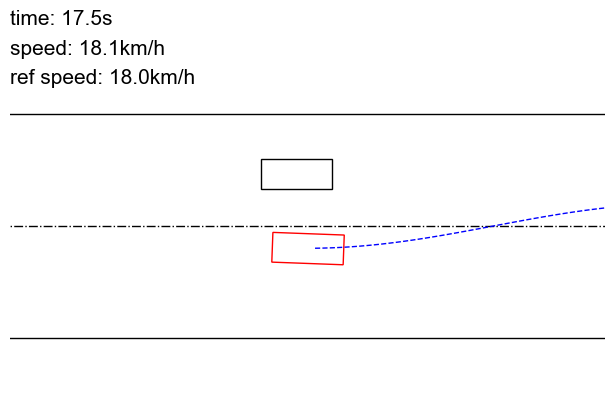

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.0807650163769722 



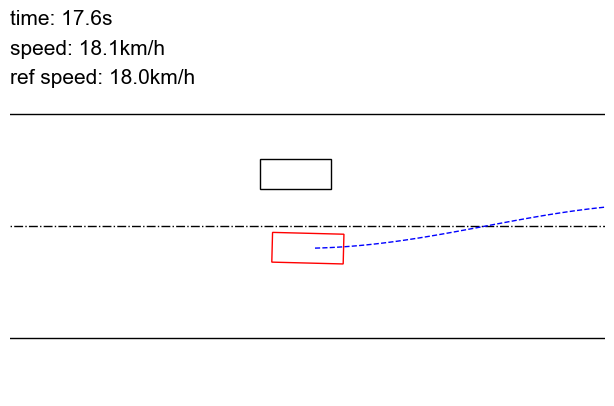

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 11
* Constraint calls: 24
* System simulations: 35
* Final cost: 0.09147609770298004 



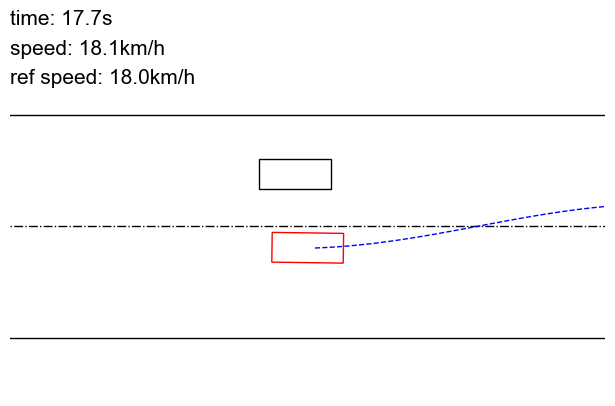

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.10361377894878387 



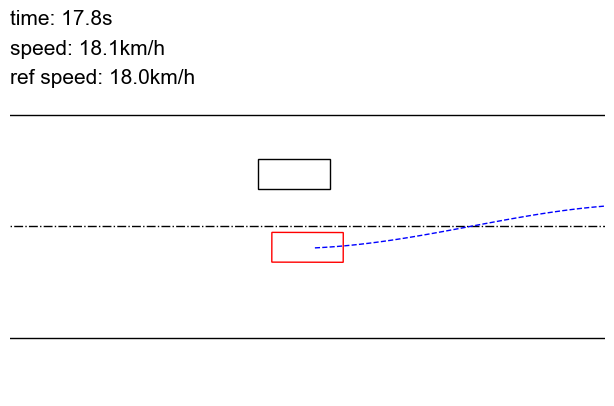

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 11
* Constraint calls: 23
* System simulations: 34
* Final cost: 0.11662764847278595 



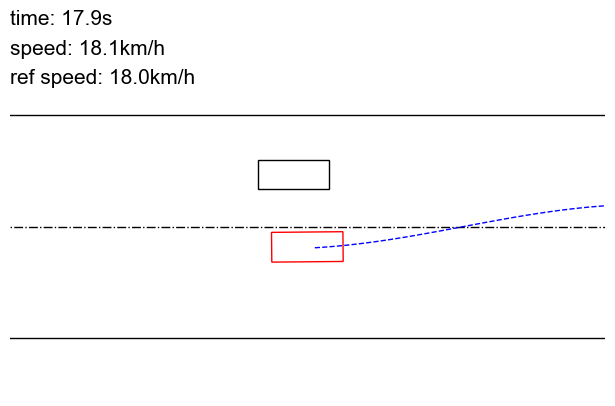

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.12994450330734253 



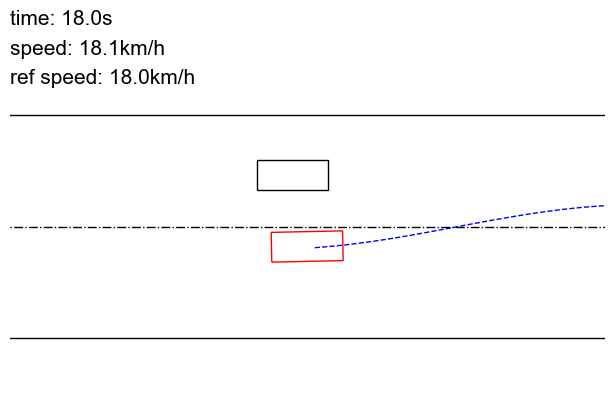

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.1430024355649948 



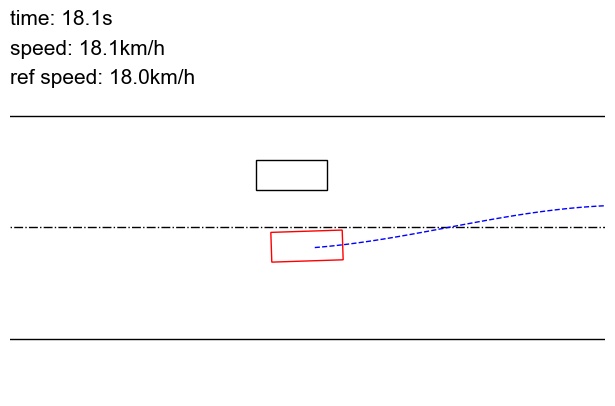

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.15536822378635406 



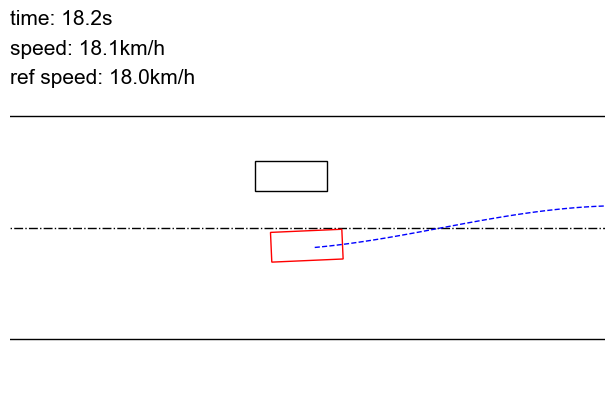

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.16850519180297852 



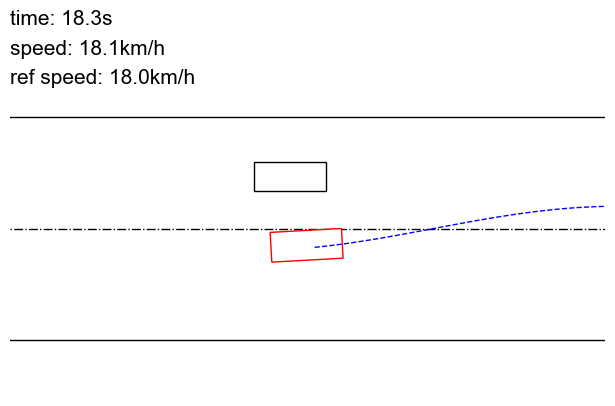

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.1823909878730774 



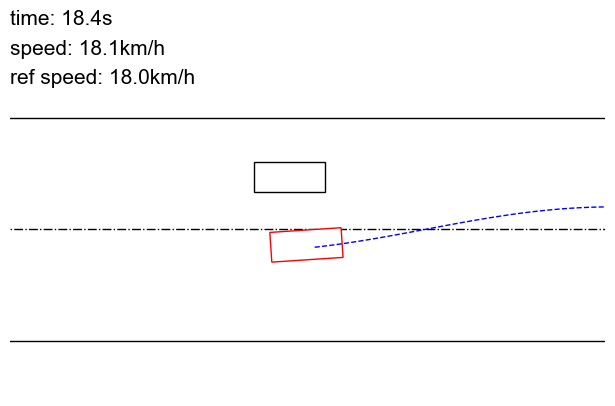

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.1968938559293747 



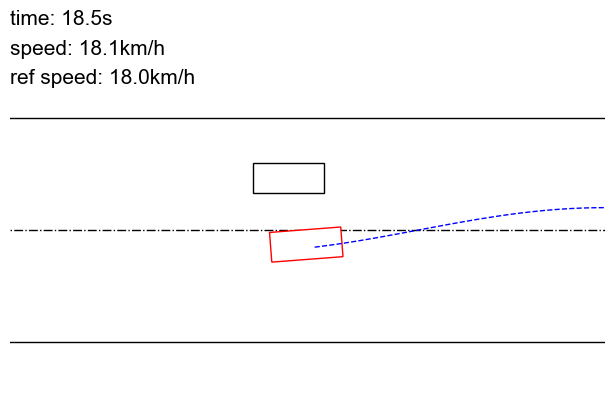

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.21163572371006012 



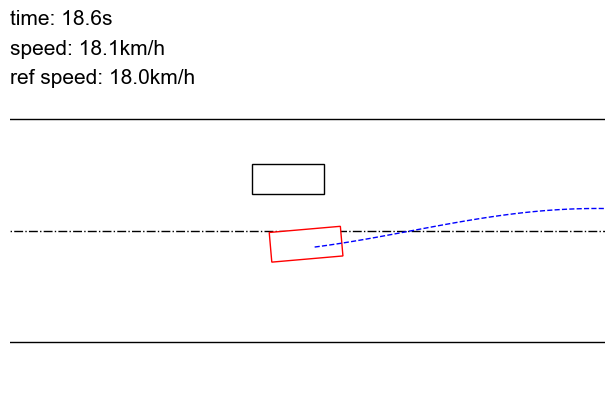

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.22629903256893158 



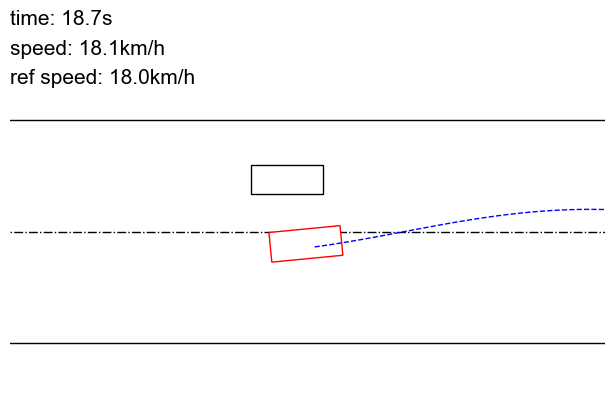

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.24068540334701538 



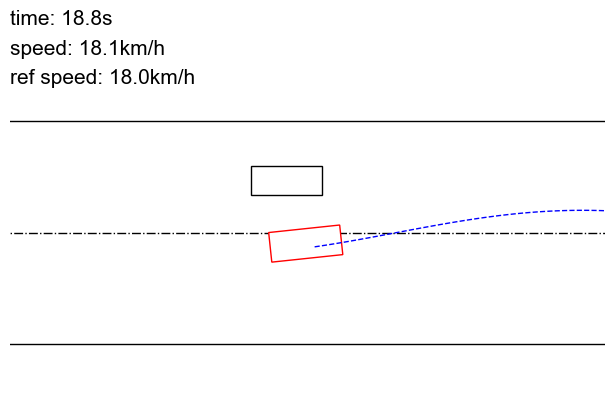

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.2545772194862366 



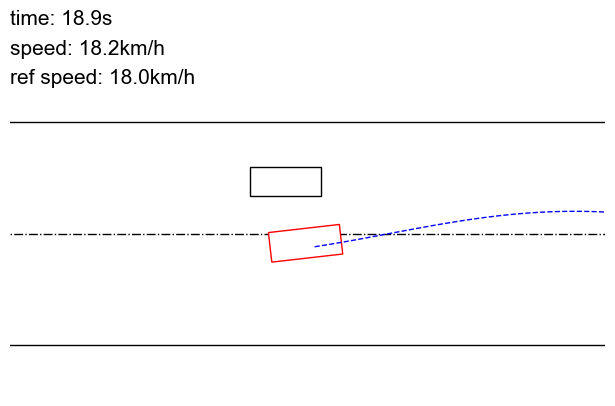

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.2677490711212158 



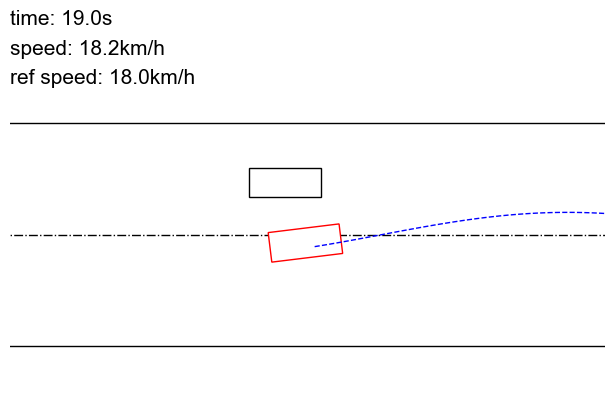

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.2800409197807312 



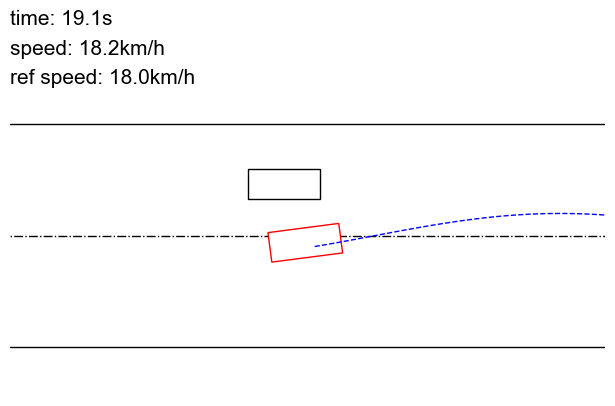

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.29130613803863525 



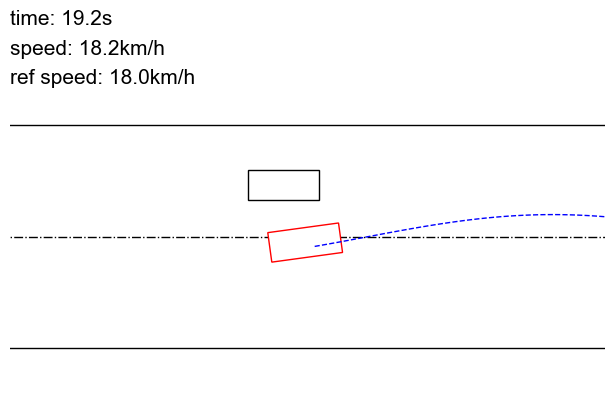

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.3014669418334961 



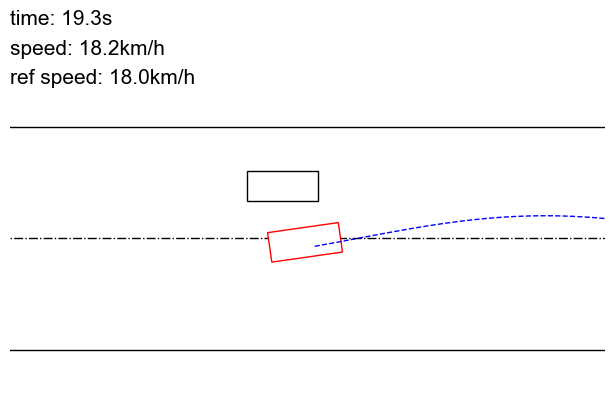

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.31048765778541565 



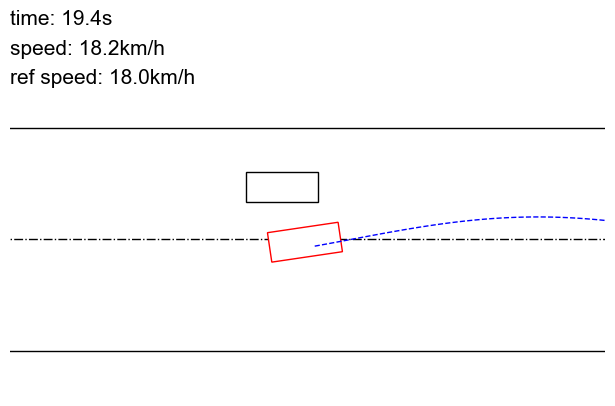

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.3184366226196289 



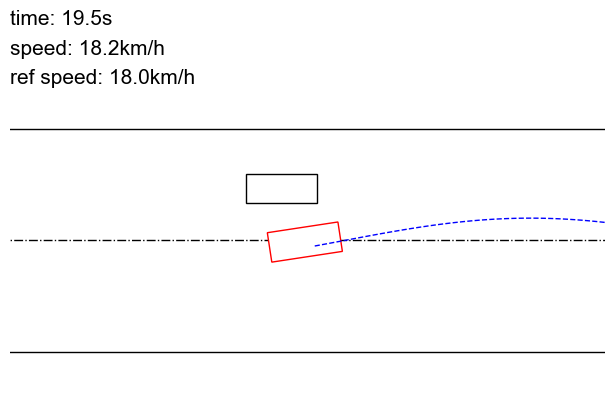

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.32536599040031433 



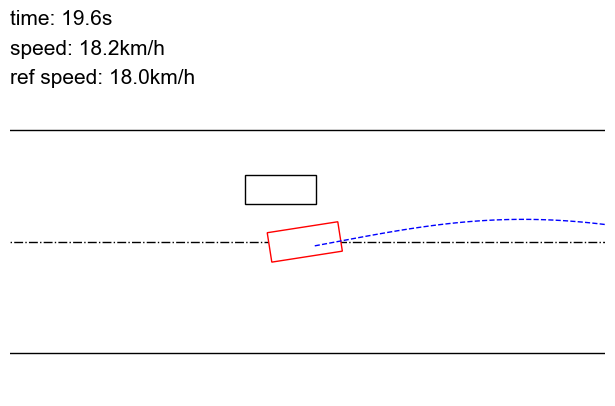

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.3314337432384491 



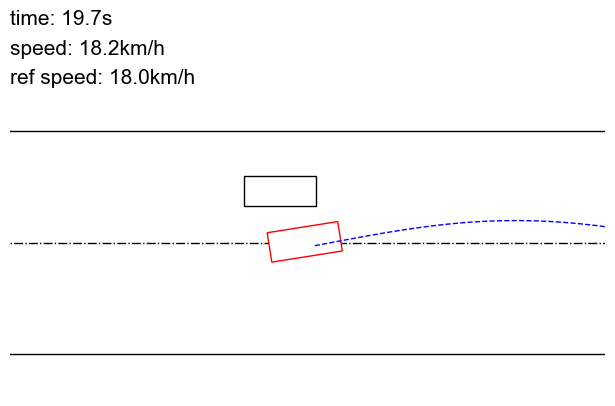

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.3367927372455597 



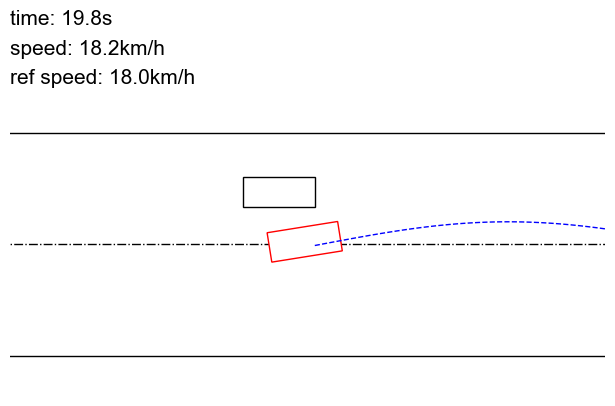

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.3416992127895355 



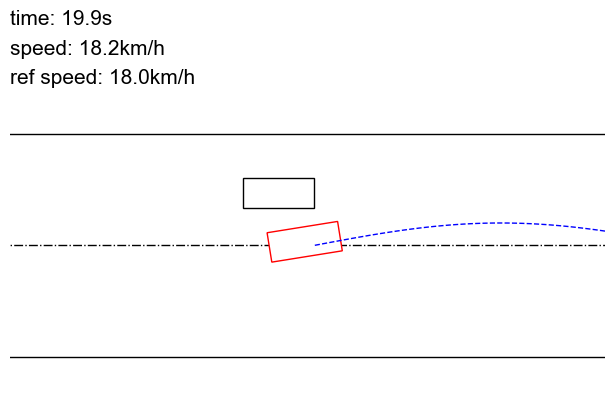

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.34641849994659424 



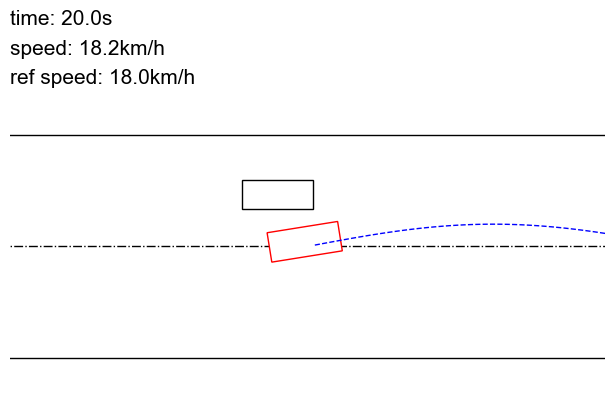

In [2]:
from src.shared import get_env
from src.tester import mpc_sample_episodes_batched_with_infos
from src.env.tracking.pyth_veh3dofconti_surrcstr_model import Veh3dofcontiSurrCstrModel
env_name = "tracking_model"

nn_dir = "02-25-23_13.47.32_DRPO_22" # fill in this
log_dir = "MPC"

# load cfg from the trained model
cfg = Config()
model = Veh3dofcontiSurrCstrModel(**cfg.env_cfg)

assert log_dir is not None, 'Must specify --run-dir'
run_dir = LOGS_DIR / nn_dir
assert run_dir.is_dir(), f'Run directory does not exist: {run_dir}'

with (run_dir / 'config.json').open('r') as f:
    saved_cfg = json.load(f)
    cfg.update(saved_cfg)

cfg.alg_cfg.update(dict(mode='test'))
cfg.env_cfg.update(dict(render=True))

# Ensure all required arguments have been set
for attr in ('env_name', 'seed'):
    assert hasattr(cfg, attr), f'Config must specify {attr}'

# creat MPC controller
env = get_env(env_name, wrap_torch = False, rescale_action = False, **{**cfg.env_cfg, **dict(id=0)})
opt_args = cfg.opt_args
MPC_controller = OptController(model, **opt_args,)

# load model and set env
test_log_dir = run_dir / log_dir
test_log_dir.mkdir(exist_ok=True, parents=True)

print(f'Test log directory: {test_log_dir}')

# run evaluation
print("env", env)
test_traj, info_traj = mpc_sample_episodes_batched_with_infos(env, MPC_controller, 1)

In [3]:
lengths = [len(traj) for traj in test_traj]
length_mean = float(np.mean(lengths))

returns = [traj.get('rewards').sum().item() for traj in test_traj]
return_mean = float(np.mean(returns))

print(f'test length mean: {length_mean}')
print(f'test return mean: {return_mean}')

test length mean: 200.0
test return mean: -2.1257717609405518


In [4]:
# get necessary data trajectories
traj_len = len(test_traj[0].get("actions"))
time_steps = np.arange(traj_len) * 0.1

surrs_states = np.array(info_traj[0]["surr_state"], dtype=np.float32)
states = np.array(info_traj[0]["state"], dtype=np.float32)
actions = np.array(test_traj[0].get("actions").cpu().numpy(), dtype=np.float32)
constraints = np.array(info_traj[0]["constraint_value"], dtype=np.float32)
video = np.array(info_traj[0]["img"], dtype=np.float32) / 255.0

ego_pos = states[:, :2]
ref_pos = np.array(info_traj[0]["ref_points"], dtype=np.float32)[:, 0, :2]
surrs_poses = surrs_states[:, :, :2]

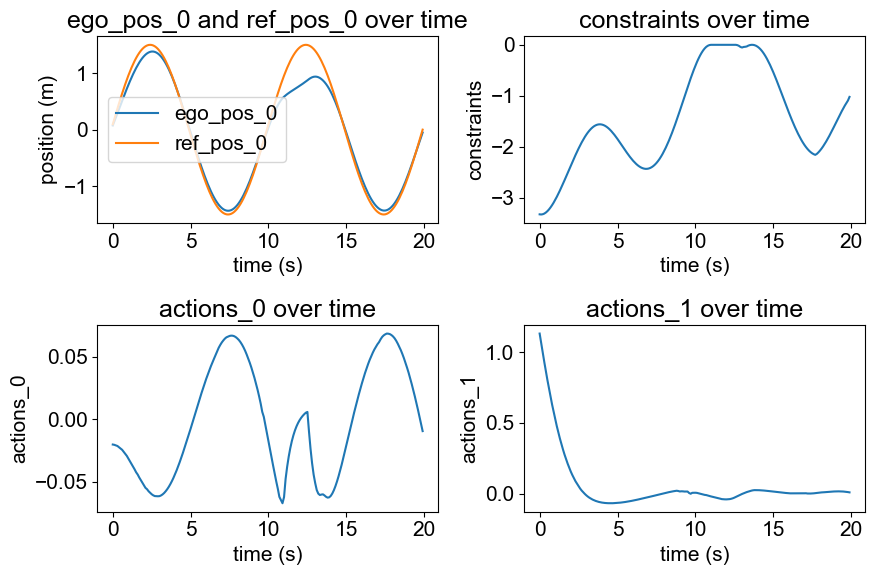

In [5]:
# plot curves
# draw a 2 * 2 figure, where the top left is the ref_pos_1 (red) and ego_pos_1 (blue) evolution
# over time; top right the constraints; bottom left the actions_0; bottom right the actions_1
fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs[0, 0].plot(time_steps, ego_pos[:, 1], label="ego_pos_0")
axs[0, 0].plot(time_steps, ref_pos[:, 1], label="ref_pos_0")
axs[0, 0].set_title("ego_pos_0 and ref_pos_0 over time")
axs[0, 0].set_xlabel("time (s)")
axs[0, 0].set_ylabel("position (m)")
axs[0, 0].legend()

axs[0, 1].plot(time_steps, constraints)
axs[0, 1].set_title("constraints over time")
axs[0, 1].set_xlabel("time (s)")
axs[0, 1].set_ylabel("constraints")

axs[1, 0].plot(time_steps, actions[:, 0])
axs[1, 0].set_title("actions_0 over time")
axs[1, 0].set_xlabel("time (s)")
axs[1, 0].set_ylabel("actions_0")

axs[1, 1].plot(time_steps, actions[:, 1])
axs[1, 1].set_title("actions_1 over time")
axs[1, 1].set_xlabel("time (s)")
axs[1, 1].set_ylabel("actions_1")

fig.tight_layout()

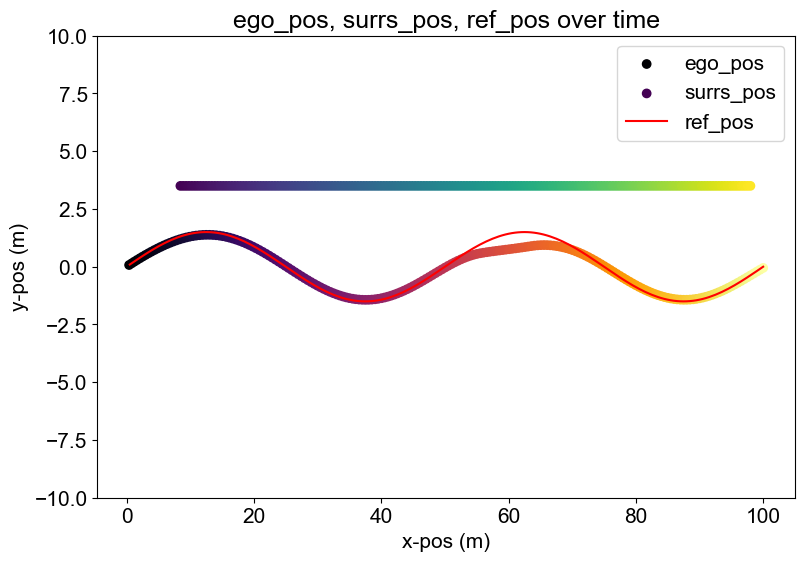

In [6]:
# draw a figure about the ego_pos, surrs_poses, ref_pos evoluation
# x-pos_0, y-pos_1 with scatter
# the color should be darker as time goes by

fig, axs = plt.subplots(1, 1, figsize=(9, 6))
axs.scatter(ego_pos[:, 0], ego_pos[:, 1], c=time_steps, label="ego_pos", cmap="inferno")
axs.scatter(surrs_poses[:, :, 0], surrs_poses[:, :, 1], c=time_steps, label="surrs_pos", cmap="viridis")
axs.plot(ref_pos[:, 0], ref_pos[:, 1], label="ref_pos", c="red")
axs.set_title("ego_pos, surrs_pos, ref_pos over time")
axs.set_xlabel("x-pos (m)")
axs.set_ylabel("y-pos (m)")
axs.set_ylim(-10, 10)
axs.legend()

In [7]:
# draw animations
fig = plt.figure()
im = plt.imshow(video[0,:,:,:])
plt.axis('off')

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:,:])

def animate(i):
    im.set_data(video[i,:,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

In [8]:
# create a dataframe to store the data
data = {
    "time_step": time_steps, 
    "ego_pos_0": ego_pos[:, 0], "ego_pos_1": ego_pos[:, 1], 
    "surrs_pos_0": surrs_poses[:, :, 0].squeeze(), "surrs_pos_1": surrs_poses[:, :, 1].squeeze(),
    "ref_pos_0": ref_pos[:, 0], "ref_pos_1": ref_pos[:, 1],
    "actions_0": actions[:, 0], "actions_1": actions[:, 1],
    "constraints": constraints,
    "time": info_traj[0]["time"],
}
df = pd.DataFrame(data=data)
df.to_csv(test_log_dir / "mpc_data.csv")
df

time_step   ego_pos_0  ego_pos_1  surrs_pos_0  surrs_pos_1  ref_pos_0  \
0          0.0    0.393078   0.074093     8.450000          3.5        0.5   
1          0.1    0.798003   0.146536     8.900000          3.5        1.0   
2          0.2    1.213725   0.219126     9.350000          3.5        1.5   
3          0.3    1.639519   0.292017     9.800000          3.5        2.0   
4          0.4    2.074732   0.365055    10.250000          3.5        2.5   
..         ...         ...        ...          ...          ...        ...   
195       19.5   98.011581  -0.375214    96.199997          3.5       98.0   
196       19.6   98.510155  -0.293367    96.650002          3.5       98.5   
197       19.7   99.008896  -0.211796    97.099998          3.5       99.0   
198       19.8   99.507881  -0.131012    97.550003          3.5       99.5   
199       19.9  100.007179  -0.051529    98.000000          3.5      100.0   

        ref_pos_1  actions_0  actions_1  constraints      time  
0    9.418578e-02  -0.020083   1.133641    -3.329314  8.013654  
1    1.879998e-01  -0.020315   1.064872    -3.332337  3.203573  
2    2.810720e-01  -0.020767   0.997249    -3.327235  2.984513  
3    3.730348e-01  -0.021244   0.930926    -3.314216  6.179812  
4    4.635255e-01  -0.022212   0.866399    -3.293737  2.766578  
..            ...        ...        ...          ...       ...  
195 -3.730348e-01   0.013078   0.014331    -1.248069  2.916145  
196 -2.810720e-01   0.007670   0.013182    -1.193424  2.709722  
197 -1.879998e-01   0.002083   0.012007    -1.141987  3.287811  
198 -9.418578e-02  -0.003615   0.010373    -1.094306  2.988047  
199 -7.347881e-16  -0.009360   0.008411    -1.023151  2.898795  

[200 rows x 11 columns]